### Problem Statement

Businesses or companies can fall prey to default if they are not able to keep up their debt obligations. Defaults will lead to a lower credit rating for the company which in turn reduces its chances of getting credit in the future and may have to pay higher interests on existing debts as well as any new obligations. From an investor's point of view, he would want to invest in a company if it is capable of handling its financial obligations, can grow quickly, and is able to manage the growth scale.

A balance sheet is a financial statement of a company that provides a snapshot of what a company owns, owes, and the amount invested by the shareholders. Thus, it is an important tool that helps evaluate the performance of a business.

Data that is available includes information from the financial statement of the companies for the previous year (2015). Also, information about the Networth of the company in the following year (2016) is provided which can be used to drive the labeled field.

### Importing the libraries

In [1680]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")

### Importing the dataset

In [1681]:
default = pd.read_excel('Company_Data2015-1.xlsx')

#Glimpse of Data
default.head()

,Co_Code,Co_Name,Networth Next Year,Equity Paid Up,Networth,Capital Employed,Total Debt,Gross Block,Net Working Capital,Current Assets,...,PBIDTM (%)[Latest],PBITM (%)[Latest],PBDTM (%)[Latest],CPM (%)[Latest],APATM (%)[Latest],Debtors Velocity (Days),Creditors Velocity (Days),Inventory Velocity (Days),Value of Output/Total Assets,Value of Output/Gross Block
0,16974,Hind.Cables,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,...,0.00,0.00,0.00,0.00,0.00,0,0,45.00,0.00,0.00
1,21214,Tata Tele. Mah.,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,...,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.00,0.31,0.24
2,14852,ABG Shipyard,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,...,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.00,-0.03,-0.26
3,2439,GTL,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,...,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.00,0.24,1.90
4,23505,Bharati Defence,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,...,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.00,0.01,0.05


In [1682]:
default.columns = default.columns.str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('%', 'perc').str.replace('/', '_to_').str.replace('[', '_').str.replace(']', '_').str.replace('-', '_')

In [1683]:
default.shape

(3586, 67)

### Creating a default variable that should take the value of 1 when net worth next year is negative & 0 when net worth next year is positive.

In [1684]:
 default['Default'] = [0 if a >= 0 else 1 for a in default['Networth_Next_Year']] 

In [1685]:
default.head()

,Co_Code,Co_Name,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block_,Net_Working_Capital_,Current_Assets_,...,PBITM_perc_Latest_,PBDTM_perc_Latest_,CPM_perc_Latest_,APATM_perc_Latest_,Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block,Default
0,16974,Hind.Cables,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,...,0.00,0.00,0.00,0.00,0,0,45.00,0.00,0.00,1
1,21214,Tata Tele. Mah.,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,...,-39.74,-57.74,-57.74,-87.18,29,101,2.00,0.31,0.24,1
2,14852,ABG Shipyard,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,...,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.00,-0.03,-0.26,1
3,2439,GTL,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,...,-7.21,-48.13,-47.70,-51.58,93,63,2.00,0.24,1.90,1
4,23505,Bharati Defence,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,...,-400.55,-845.88,379.79,274.79,3887,346,0.00,0.01,0.05,1


### First, let us check the number of rows (observations) and the number of columns (variables).

In [1686]:
print('The number of rows (observations) is',default.shape[0],'\n''The number of columns (variables) is',default.shape[1])

The number of rows (observations) is 3586 
The number of columns (variables) is 68


### Data types of all variables

In [1687]:
default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 68 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Co_Code                              3586 non-null   int64  
 1   Co_Name                              3586 non-null   object 
 2   Networth_Next_Year                   3586 non-null   float64
 3   Equity_Paid_Up                       3586 non-null   float64
 4   Networth                             3586 non-null   float64
 5   Capital_Employed                     3586 non-null   float64
 6   Total_Debt                           3586 non-null   float64
 7   Gross_Block_                         3586 non-null   float64
 8   Net_Working_Capital_                 3586 non-null   float64
 9   Current_Assets_                      3586 non-null   float64
 10  Current_Liabilities_and_Provisions_  3586 non-null   float64
 11  Total_Assets_to_Liabilities_  

In [1688]:
default.duplicated().sum()

0

In [1689]:
for feature in default.columns: 
    if default[feature].dtype == 'object':
        default[feature] = pd.Categorical(default[feature]).codes 

In [1690]:
default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 68 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Co_Code                              3586 non-null   int64  
 1   Co_Name                              3586 non-null   int16  
 2   Networth_Next_Year                   3586 non-null   float64
 3   Equity_Paid_Up                       3586 non-null   float64
 4   Networth                             3586 non-null   float64
 5   Capital_Employed                     3586 non-null   float64
 6   Total_Debt                           3586 non-null   float64
 7   Gross_Block_                         3586 non-null   float64
 8   Net_Working_Capital_                 3586 non-null   float64
 9   Current_Assets_                      3586 non-null   float64
 10  Current_Liabilities_and_Provisions_  3586 non-null   float64
 11  Total_Assets_to_Liabilities_  

### Now, let us check the basic measures of descriptive statistics for the continuous variables.

In [1691]:
default.describe()

,Co_Code,Co_Name,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block_,Net_Working_Capital_,Current_Assets_,...,PBITM_perc_Latest_,PBDTM_perc_Latest_,CPM_perc_Latest_,APATM_perc_Latest_,Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block,Default
count,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,...,3585.00,3585.00,3585.00,3585.00,3586.00,3586.00,3483.00,3586.00,3586.00,3586.00
mean,16065.39,1792.50,725.05,62.97,649.75,2799.61,1994.82,594.18,410.81,1960.35,...,-109.21,-311.57,-307.01,-365.06,603.89,2057.85,79.64,0.82,61.88,0.11
std,19776.82,1035.33,4769.68,778.76,4091.99,26975.14,23652.84,4871.55,6301.22,22577.57,...,3057.64,10921.59,10676.15,12500.05,10636.76,54169.48,137.85,1.20,976.82,0.31
min,4.00,0.00,-8021.60,0.00,-7027.48,-1824.75,-0.72,-41.19,-13162.42,-0.91,...,-141600.00,-590500.00,-572000.00,-688600.00,0.00,0.00,-199.00,-0.33,-61.00,0.00
25%,3029.25,896.25,3.98,3.75,3.89,7.60,0.03,0.57,0.94,4.00,...,0.00,0.00,0.00,0.00,8.00,8.00,0.00,0.07,0.27,0.00
50%,6077.50,1792.50,19.02,8.29,18.58,39.09,7.49,15.87,10.14,24.54,...,5.23,4.69,3.89,1.59,49.00,39.00,35.00,0.48,1.53,0.00
75%,24269.50,2688.75,123.80,19.52,117.30,226.60,72.35,131.90,61.17,135.28,...,14.29,14.11,11.39,7.41,106.00,89.00,96.00,1.16,4.91,0.00
max,72493.00,3585.00,111729.10,42263.46,81657.35,714001.25,652823.81,128477.59,223257.56,721166.00,...,19195.70,15640.00,15640.00,15266.67,514721.00,2034145.00,996.00,17.63,43404.00,1.00


#### Now, let us check the basic measures of descriptive statistics for the categorical variables.

In [1692]:
default["Default"].value_counts()

0    3199
1     387
Name: Default, dtype: int64

#### Checking proportion of default

In [1693]:
default.Default.sum() / len(default.Default)

0.1079196876742889

#### Check for missing values.

In [1694]:
default.isnull().sum()

Co_Code                                  0
Co_Name                                  0
Networth_Next_Year                       0
Equity_Paid_Up                           0
Networth                                 0
Capital_Employed                         0
Total_Debt                               0
Gross_Block_                             0
Net_Working_Capital_                     0
Current_Assets_                          0
Current_Liabilities_and_Provisions_      0
Total_Assets_to_Liabilities_             0
Gross_Sales                              0
Net_Sales                                0
Other_Income                             0
Value_Of_Output                          0
Cost_of_Production                       0
Selling_Cost                             0
PBIDT                                    0
PBDT                                     0
PBIT                                     0
PBT                                      0
PAT                                      0
Adjusted_PA

In [1695]:
default.dropna(inplace=True)

In [1696]:
default.isnull().sum()

Co_Code                                0
Co_Name                                0
Networth_Next_Year                     0
Equity_Paid_Up                         0
Networth                               0
Capital_Employed                       0
Total_Debt                             0
Gross_Block_                           0
Net_Working_Capital_                   0
Current_Assets_                        0
Current_Liabilities_and_Provisions_    0
Total_Assets_to_Liabilities_           0
Gross_Sales                            0
Net_Sales                              0
Other_Income                           0
Value_Of_Output                        0
Cost_of_Production                     0
Selling_Cost                           0
PBIDT                                  0
PBDT                                   0
PBIT                                   0
PBT                                    0
PAT                                    0
Adjusted_PAT                           0
CP              

The missing values are treated in the dataset.

#### Getting Top 5 rows

In [1697]:
default.head()

,Co_Code,Co_Name,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block_,Net_Working_Capital_,Current_Assets_,...,PBITM_perc_Latest_,PBDTM_perc_Latest_,CPM_perc_Latest_,APATM_perc_Latest_,Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block,Default
0,16974,1226,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,...,0.00,0.00,0.00,0.00,0,0,45.00,0.00,0.00,1
1,21214,3214,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,...,-39.74,-57.74,-57.74,-87.18,29,101,2.00,0.31,0.24,1
2,14852,21,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,...,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.00,-0.03,-0.26,1
3,2439,1001,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,...,-7.21,-48.13,-47.70,-51.58,93,63,2.00,0.24,1.90,1
4,23505,452,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,...,-400.55,-845.88,379.79,274.79,3887,346,0.00,0.01,0.05,1


#### Eliminating the redundant variables

In [1698]:
default_1 = default[['Equity_Paid_Up','Total_Debt','Value_Of_Output','Cost_of_Production','Revenue_earnings_in_forex','Book_Value_Unit_Curr','Market_Capitalisation','Cash_Flow_From_Operating_Activities','Cash_Flow_From_Investing_Activities','Cash_Flow_From_Financing_Activities','ROG_Net_Worth_perc','Current_Ratio_Latest_','Debtors_Ratio_Latest_','CPM_perc_Latest_','Value_of_Output_to_Total_Assets','Value_of_Output_to_Gross_Block','Default']]

In [1699]:
default_1.head()

,Equity_Paid_Up,Total_Debt,Value_Of_Output,Cost_of_Production,Revenue_earnings_in_forex,Book_Value_Unit_Curr,Market_Capitalisation,Cash_Flow_From_Operating_Activities,Cash_Flow_From_Investing_Activities,Cash_Flow_From_Financing_Activities,ROG_Net_Worth_perc,Current_Ratio_Latest_,Debtors_Ratio_Latest_,CPM_perc_Latest_,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block,Default
0,419.36,5936.03,-0.07,137.67,0.00,-167.58,0.00,-102.47,1.46,92.58,-15.31,0.02,0.00,0.00,0.00,0.00,1
1,1954.93,7410.18,2900.71,2572.46,6.35,-15.18,1544.39,635.91,-785.00,176.93,-26.15,0.08,10.35,-57.74,0.31,0.24,1
2,53.84,6944.54,301.16,408.51,0.00,94.14,1220.81,-873.40,-458.27,1187.51,-61.86,1.06,0.42,-7723.67,-0.03,-0.26,1
3,157.30,2326.05,1350.14,1326.99,0.89,-39.64,194.27,324.47,17.31,-412.55,-450.67,0.09,9.26,-47.70,0.24,1.90,1
4,50.30,5740.90,38.72,186.29,0.00,-212.89,113.68,-191.54,61.34,143.65,-559.83,0.50,1.28,379.79,0.01,0.05,1


#### Checking for Outliers

<AxesSubplot:>

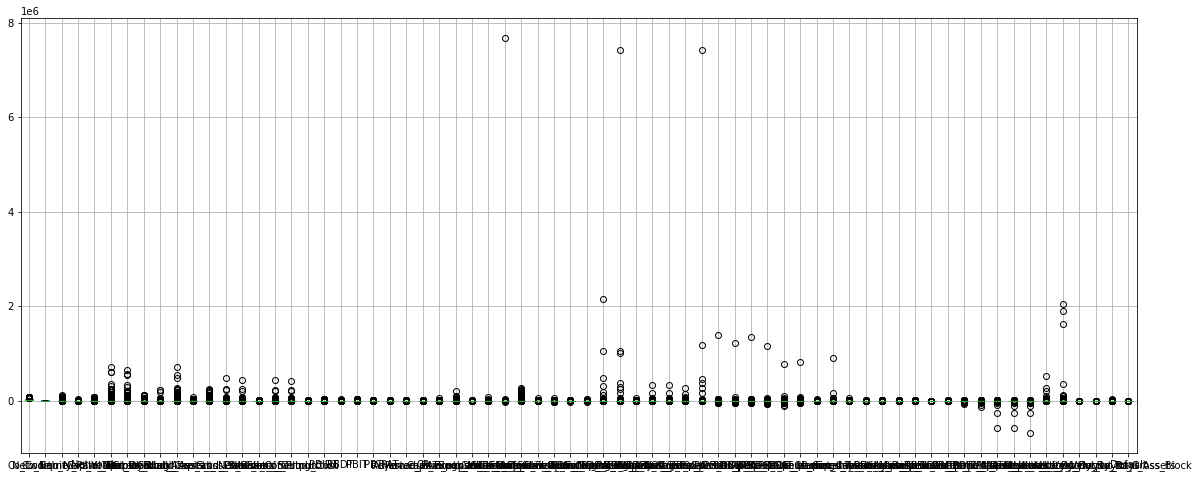

In [1700]:
plt.figure(figsize=(20,8))
default.boxplot()

In [1701]:
default_X = default.drop('Networth_Next_Year', axis = 1)
default_Y = default['Networth_Next_Year']

In [1702]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [1703]:
for column in default_X.columns:
    lr,ur=remove_outlier(default[column])
    default_X[column]=np.where(default_X[column]>ur,ur,default_X[column])
    default_X[column]=np.where(default_X[column]<lr,lr,default_X[column])

In [1704]:
default_df = pd.concat([default_X, default_Y], axis = 1)

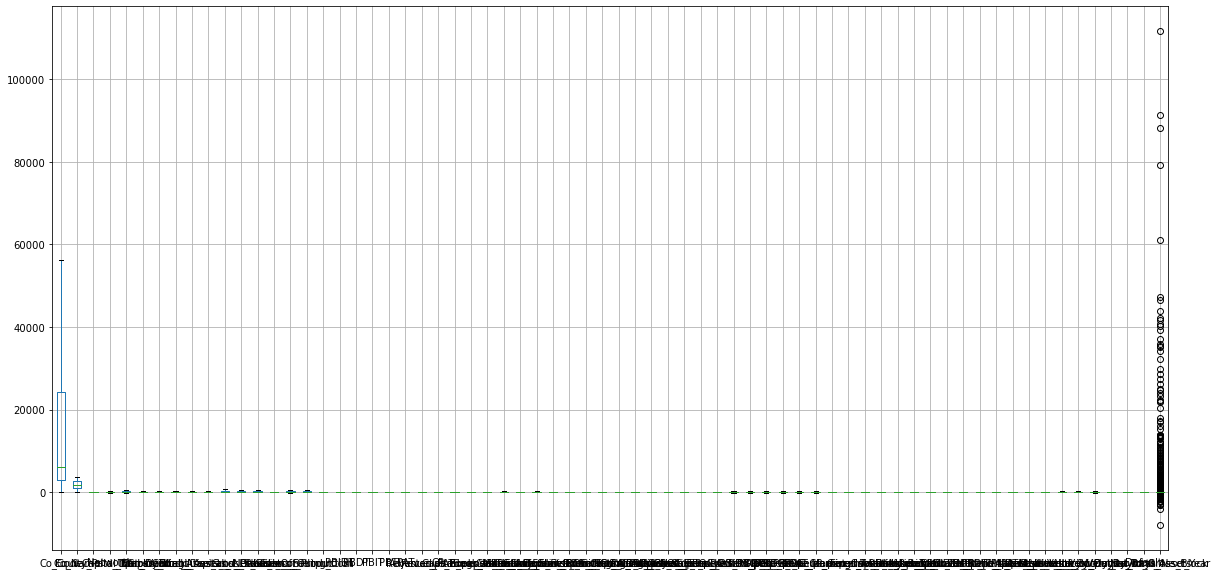

In [1705]:
plt.figure(figsize=(20,10))
default_df.boxplot();

#### Univariate Analysis

Equity_Paid_Up
Skew : 45.27


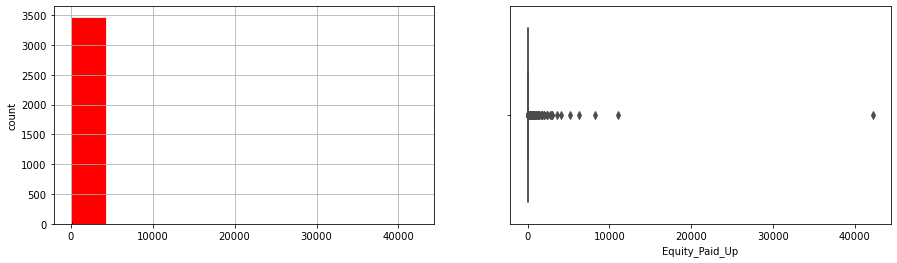

Total_Debt
Skew : 21.48


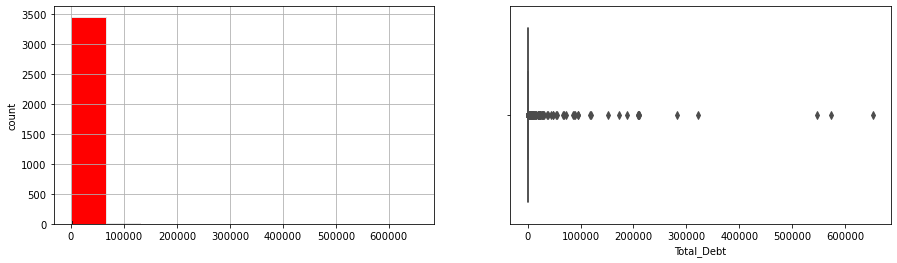

Value_Of_Output
Skew : 30.78


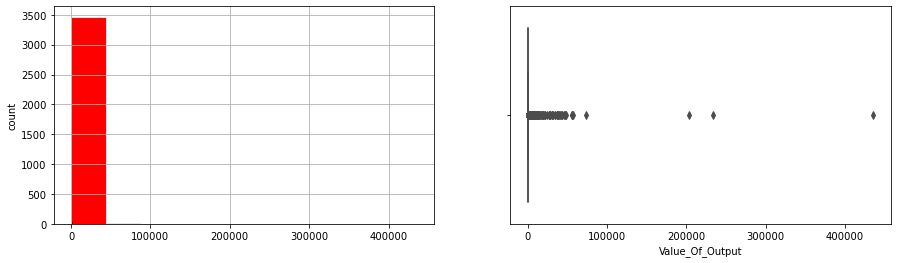

Cost_of_Production
Skew : 34.08


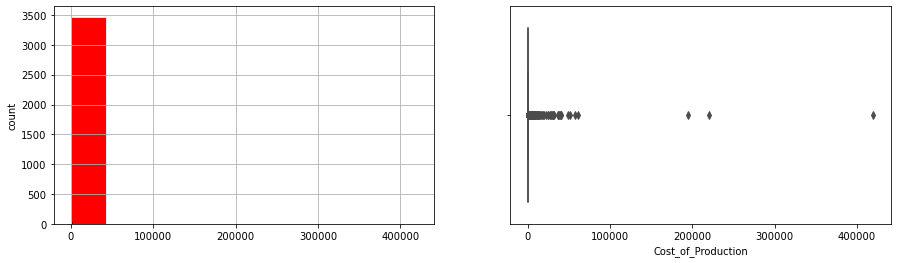

Revenue_earnings_in_forex
Skew : 23.87


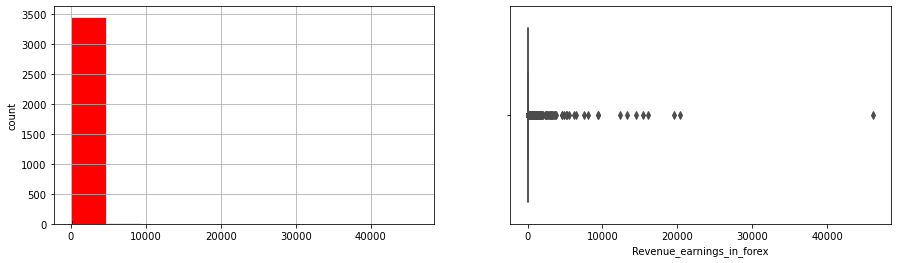

Book_Value_Unit_Curr
Skew : 37.91


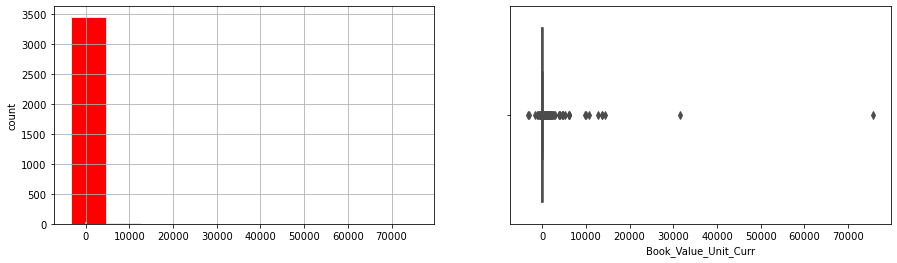

Market_Capitalisation
Skew : 14.89


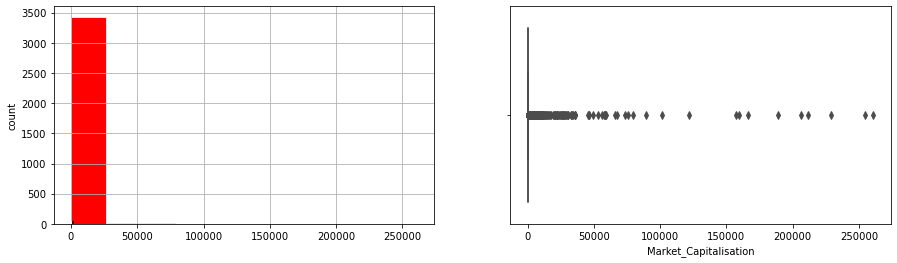

Cash_Flow_From_Operating_Activities
Skew : 8.28


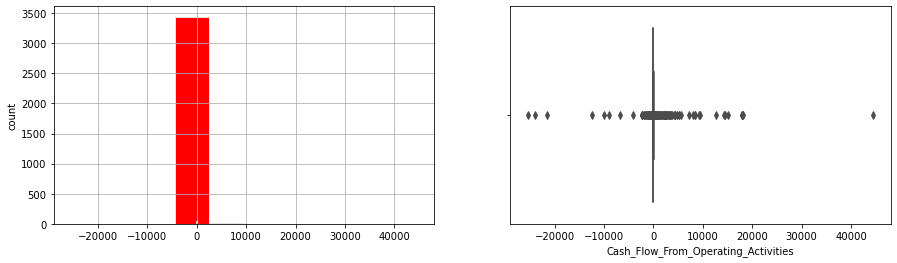

Cash_Flow_From_Investing_Activities
Skew : -21.82


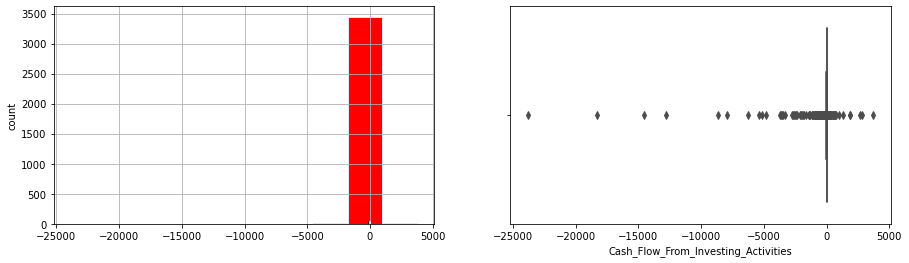

Cash_Flow_From_Financing_Activities
Skew : -2.67


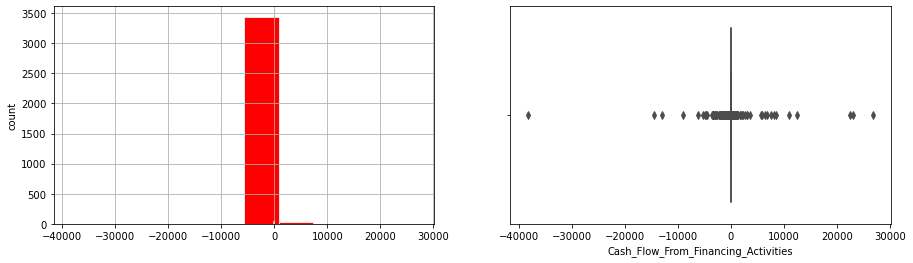

ROG_Net_Worth_perc
Skew : 44.15


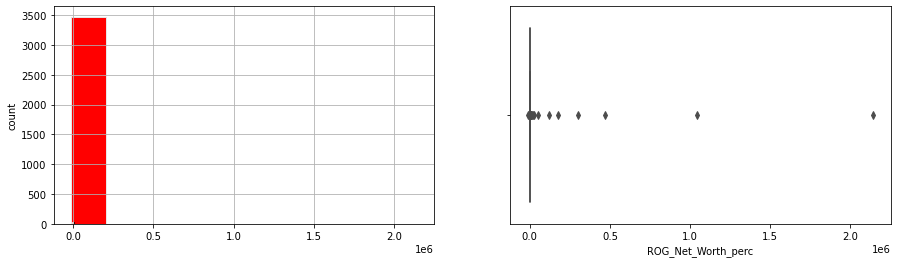

Current_Ratio_Latest_
Skew : 30.91


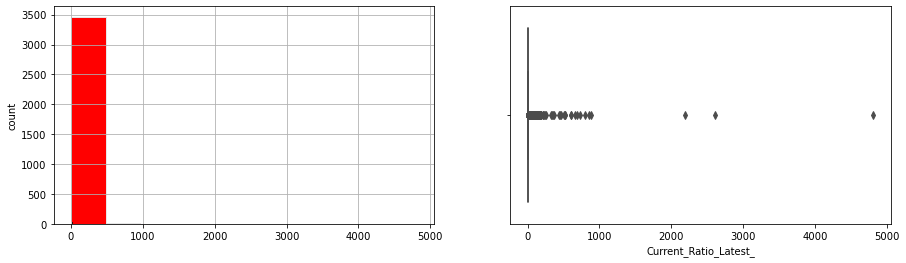

Debtors_Ratio_Latest_
Skew : 38.99


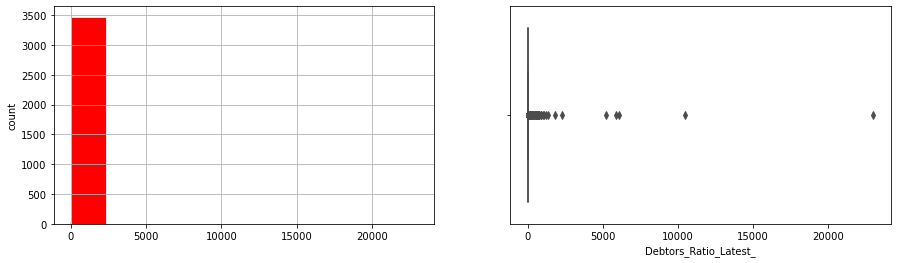

CPM_perc_Latest_
Skew : -46.34


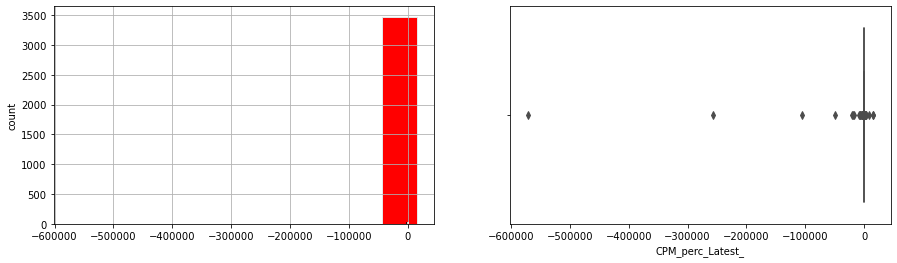

Value_of_Output_to_Total_Assets
Skew : 4.7


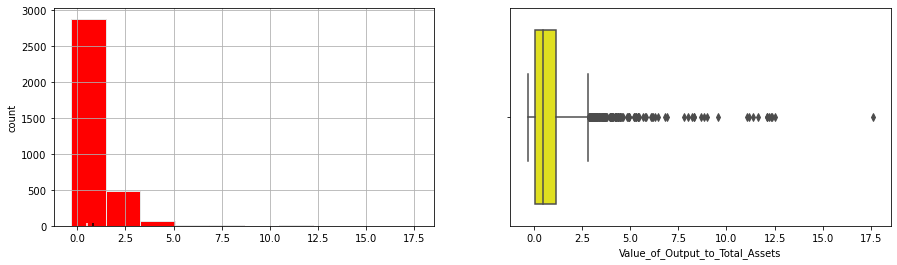

Value_of_Output_to_Gross_Block
Skew : 31.53


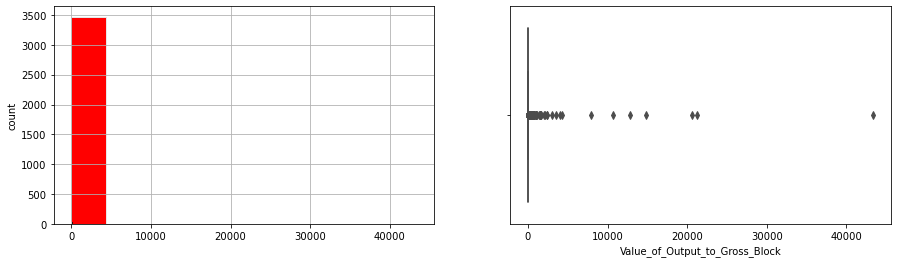

Default
Skew : 2.53


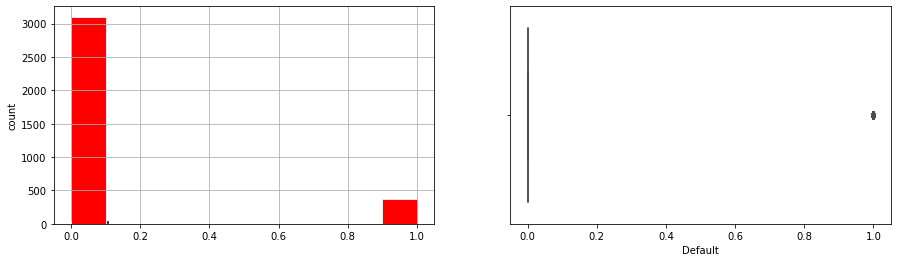

In [1706]:
cont_cols = list(default_1.columns)
for col in cont_cols:
    print(col)
    print('Skew :',round(default_1[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    default_1[col].hist(bins=10,edgecolor='#E6E6E6', color='Red')
    plt.vlines(default_1[col].mean(),ymin = 0, ymax = 40,color = 'Black')
    plt.vlines(default_1[col].median(),ymin = 0, ymax = 40,color = 'White')
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(default_1[col],color='Yellow')
    plt.show()

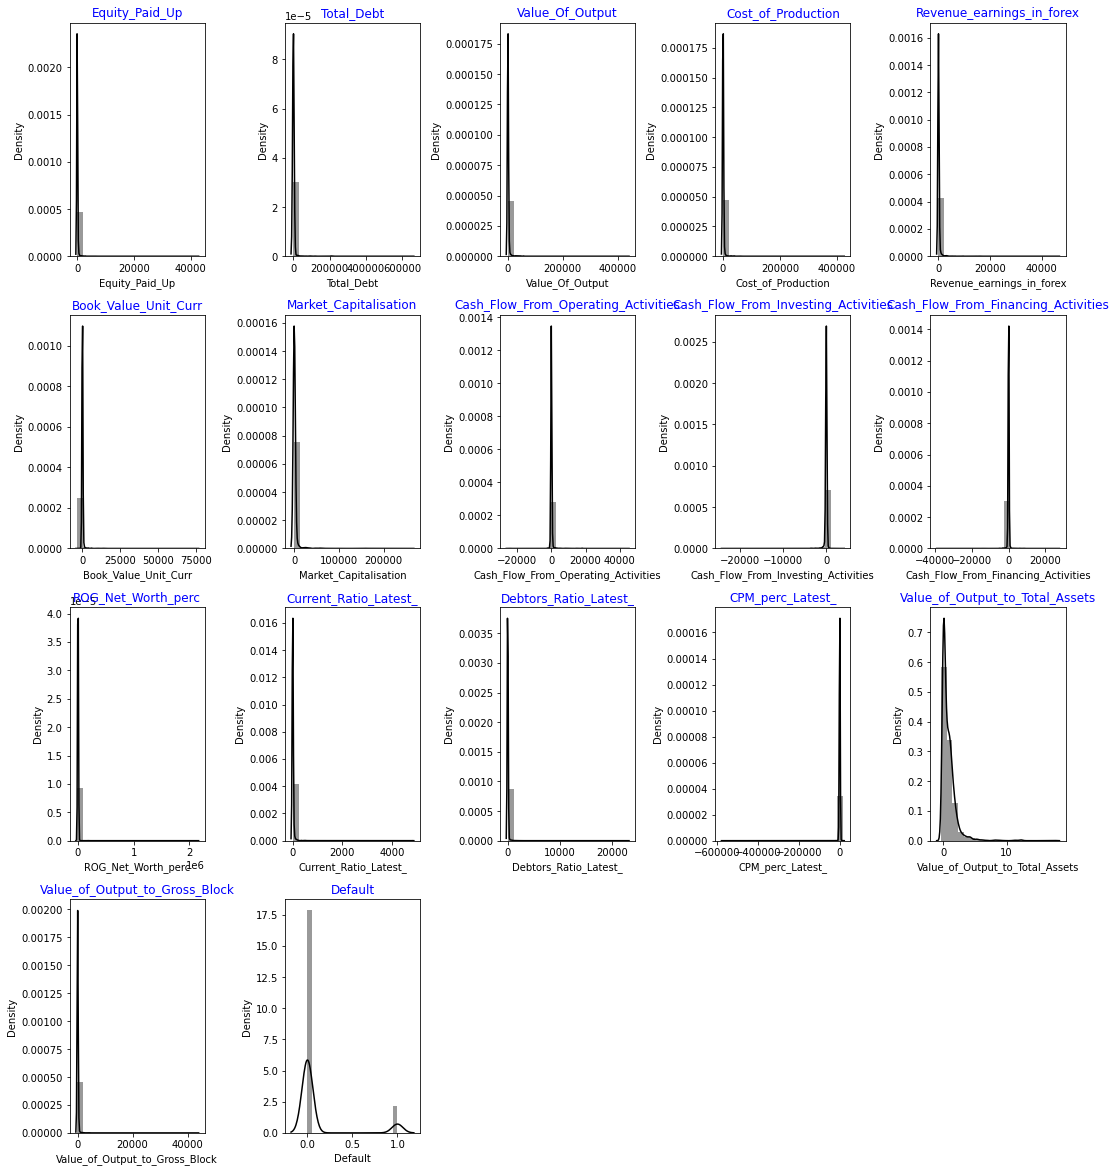

In [1707]:
data_scatter=default_1.copy(deep=True)
fig=plt.figure(figsize=(15,20))
for i in range(0,len(data_scatter.columns)):
    ax=fig.add_subplot(5,5,i+1)
    sns.distplot(data_scatter[data_scatter.columns[i]], bins=20, color= 'Black')
    ax.set_title(data_scatter.columns[i],color='Blue')
plt.tight_layout()


#### Bivariate Analysis

Equity_Paid_Up vs Default


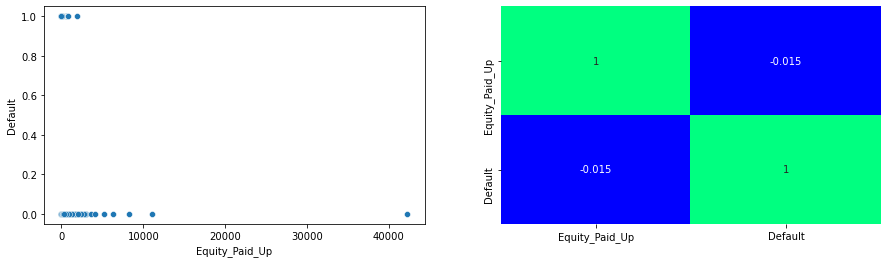

Total_Debt vs Equity_Paid_Up


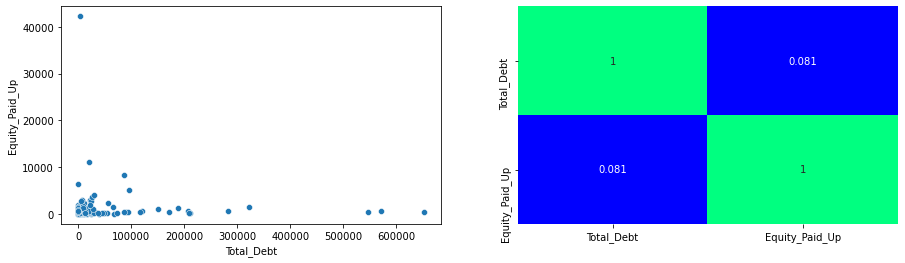

Value_Of_Output vs Total_Debt


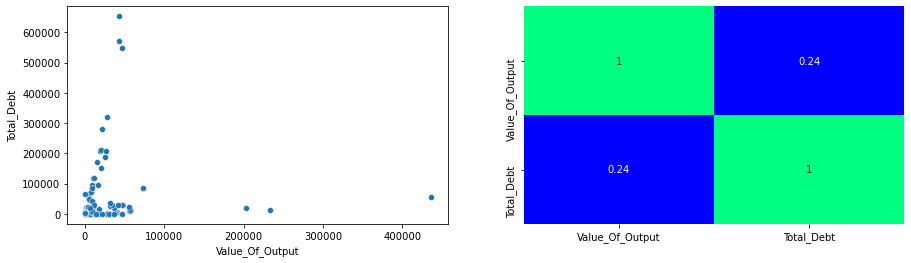

Cost_of_Production vs Value_Of_Output


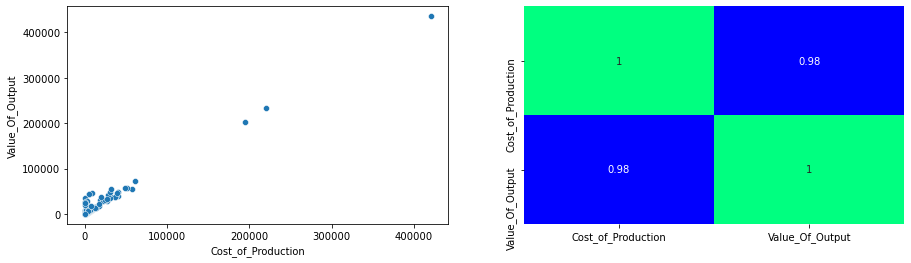

Revenue_earnings_in_forex vs Cost_of_Production


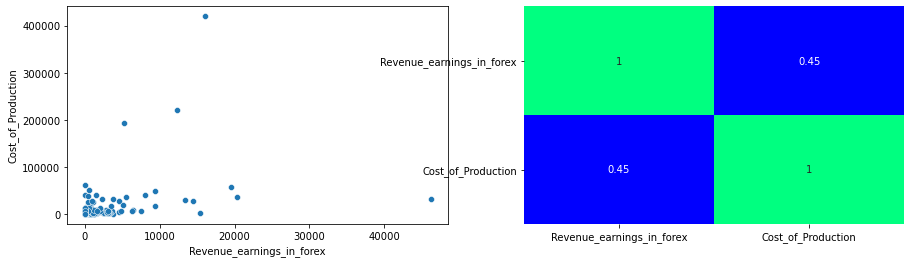

Book_Value_Unit_Curr vs Revenue_earnings_in_forex


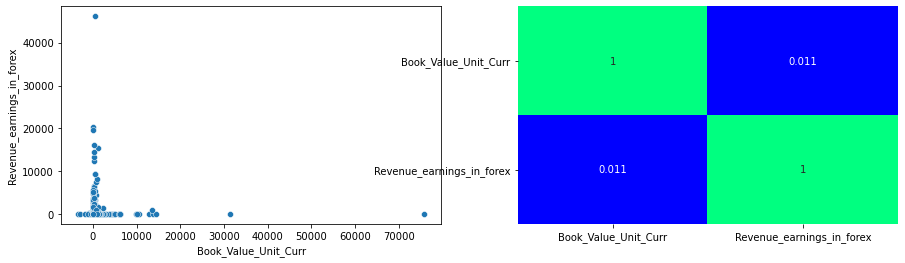

Market_Capitalisation vs Book_Value_Unit_Curr


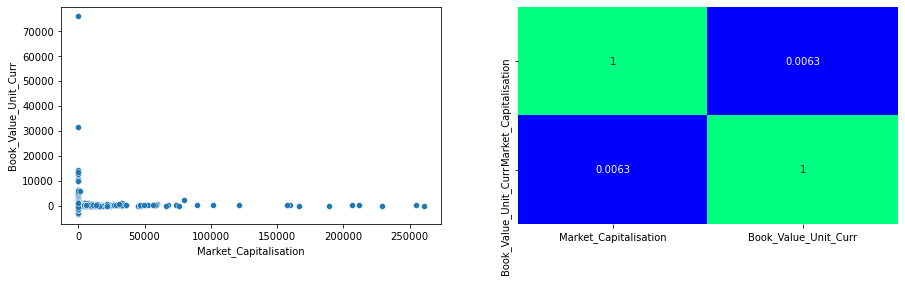

Cash_Flow_From_Operating_Activities vs Market_Capitalisation


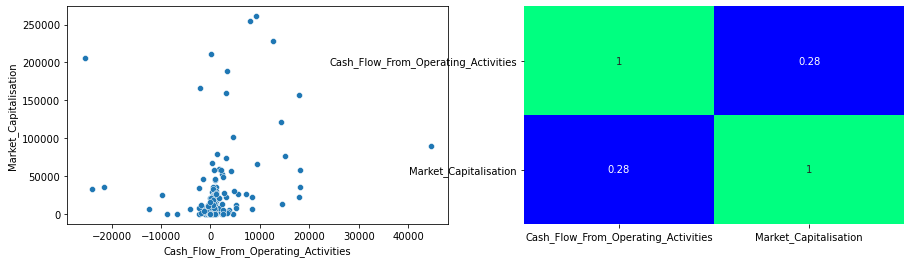

Cash_Flow_From_Investing_Activities vs Cash_Flow_From_Operating_Activities


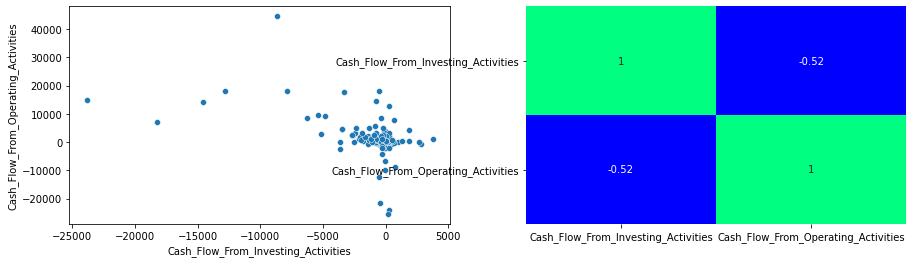

Cash_Flow_From_Financing_Activities vs Cash_Flow_From_Investing_Activities


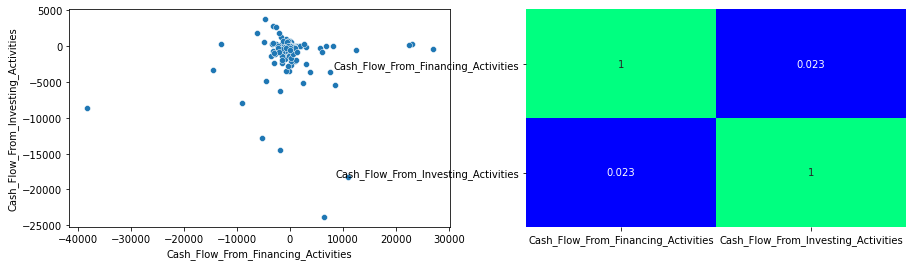

ROG_Net_Worth_perc vs Cash_Flow_From_Financing_Activities


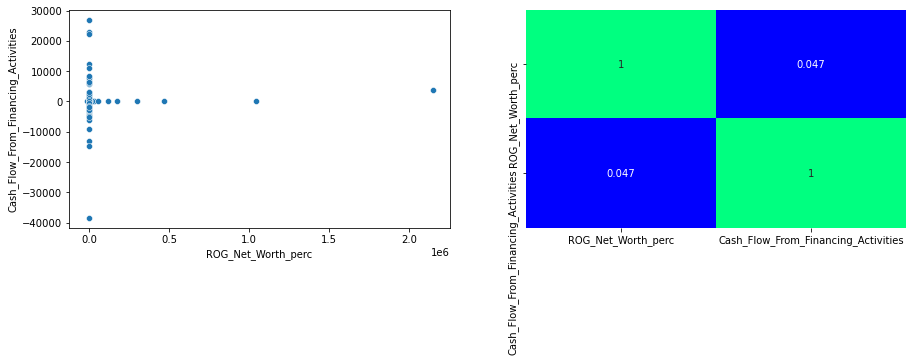

Current_Ratio_Latest_ vs ROG_Net_Worth_perc


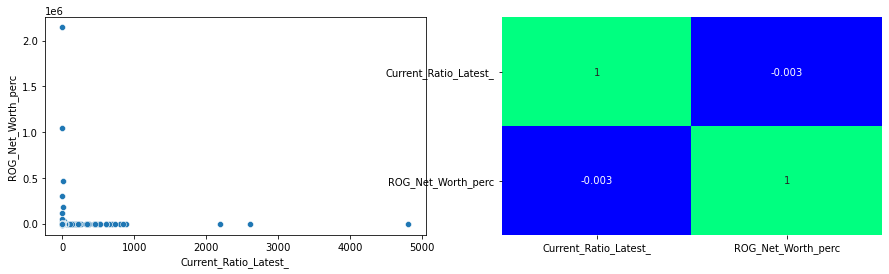

Debtors_Ratio_Latest_ vs Current_Ratio_Latest_


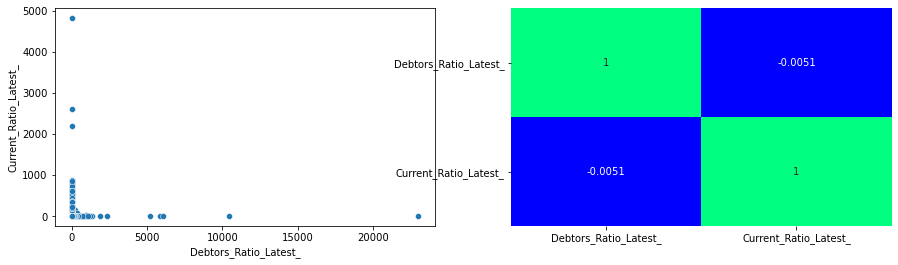

CPM_perc_Latest_ vs Debtors_Ratio_Latest_


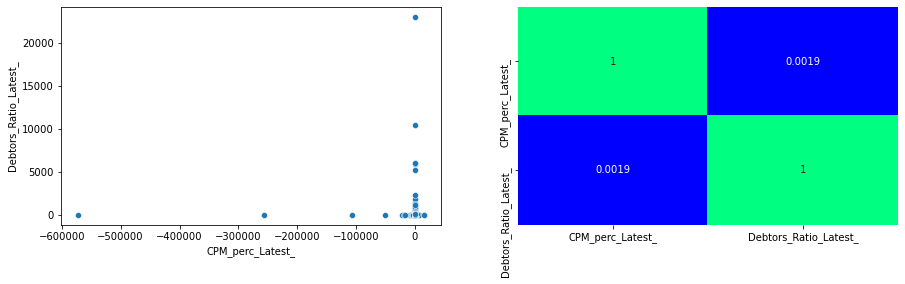

Value_of_Output_to_Total_Assets vs CPM_perc_Latest_


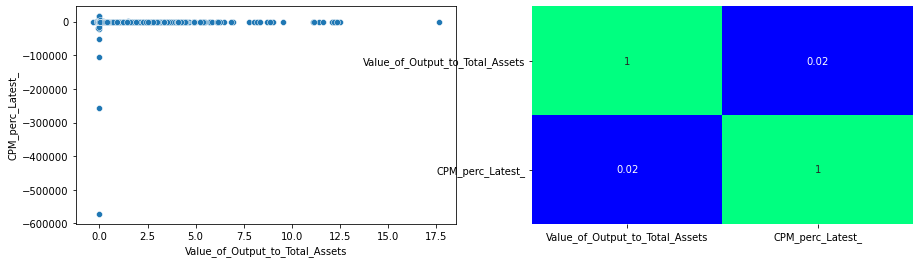

Value_of_Output_to_Gross_Block vs Value_of_Output_to_Total_Assets


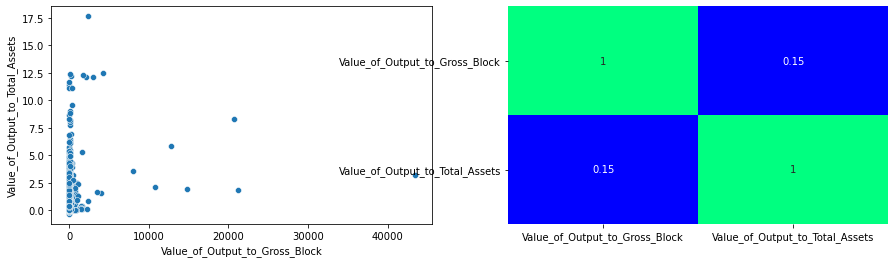

Default vs Value_of_Output_to_Gross_Block


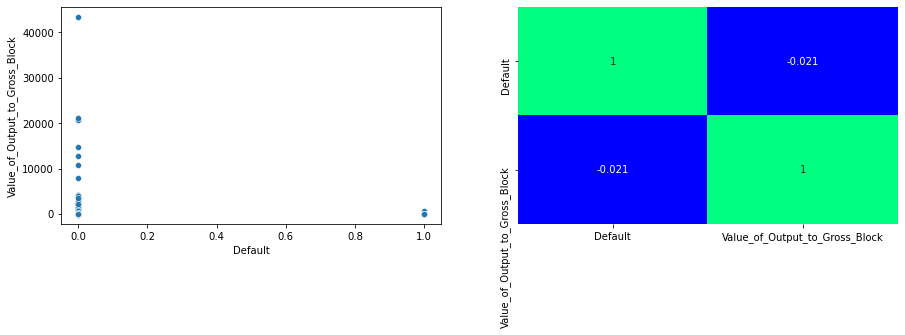

In [1708]:
sns.color_palette("tab10")

cont_cols = list(default_1.columns)
for col in range(0,len(cont_cols)):
    print(cont_cols[col],'vs',cont_cols[col-1])
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    sns.scatterplot(default_1[cont_cols[col]],default_1[cont_cols[col-1]])
    plt.subplot(1,2,2)
    sns.heatmap(np.corrcoef(default_1[cont_cols[col]],default_1[cont_cols[col-1]]),annot=True, 
                yticklabels=[cont_cols[col],cont_cols[col-1]],xticklabels=[cont_cols[col],cont_cols[col-1]]
               ,cmap='winter',cbar=False)
    plt.show()

<AxesSubplot:>

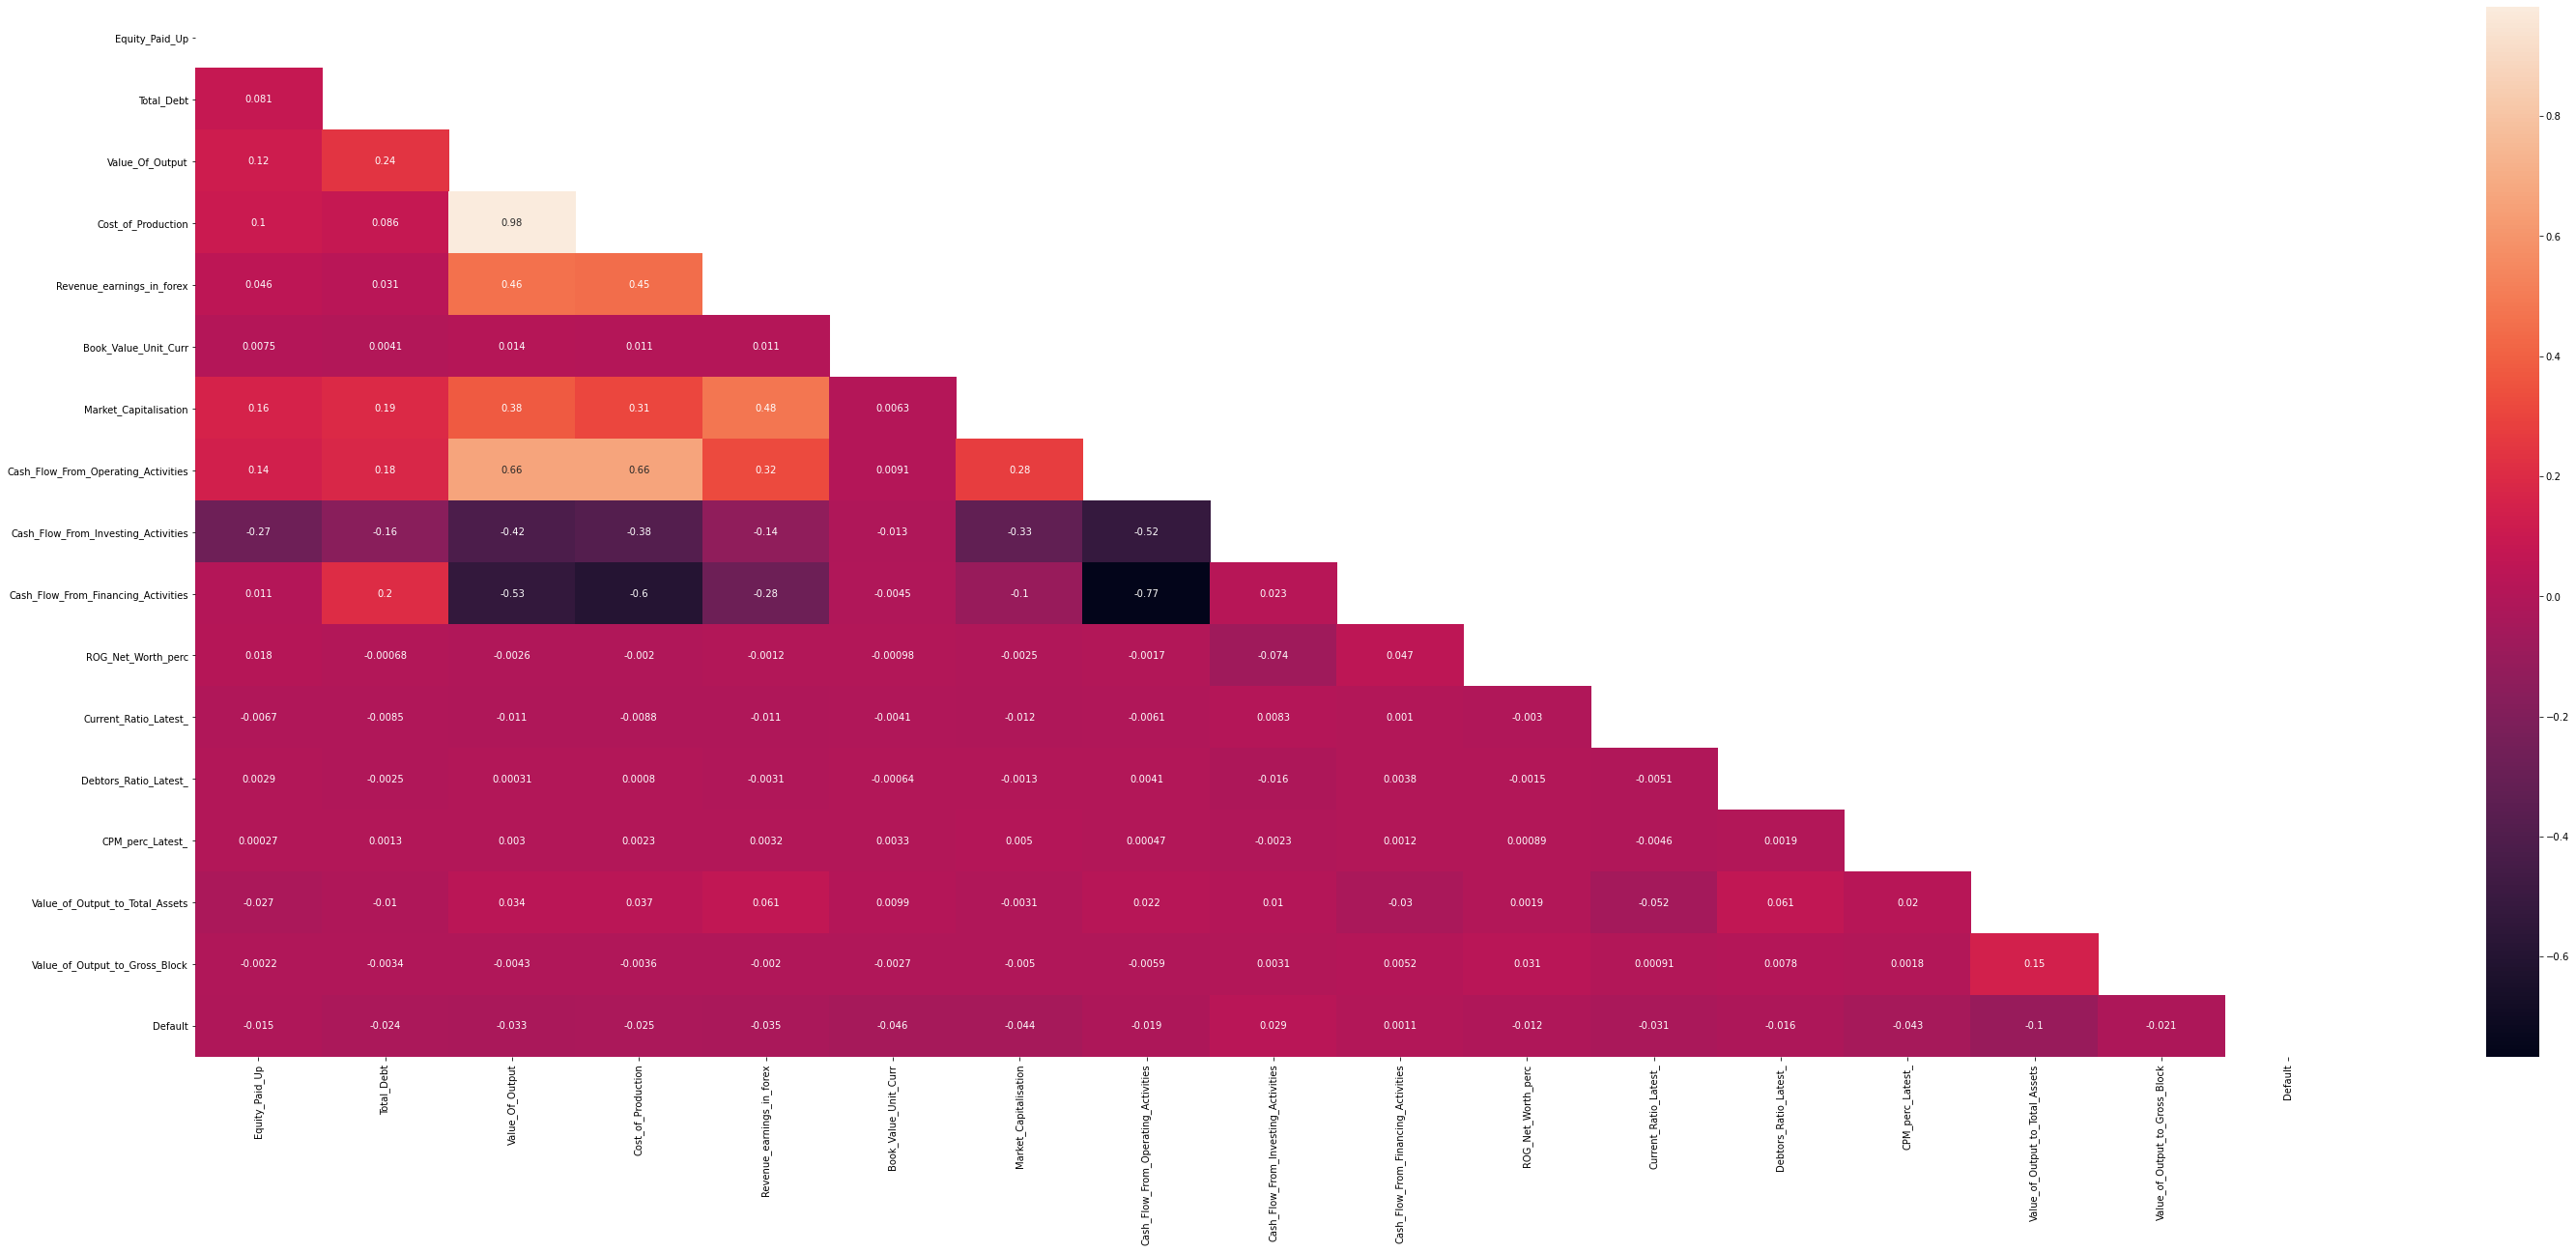

In [1709]:
sns.color_palette("tab10")
plt.figure(figsize=(50,20))
mask = np.triu(np.ones_like(default_1.corr(), dtype=bool))
sns.heatmap(default_1.corr(),annot = True,mask=mask)

<AxesSubplot:>

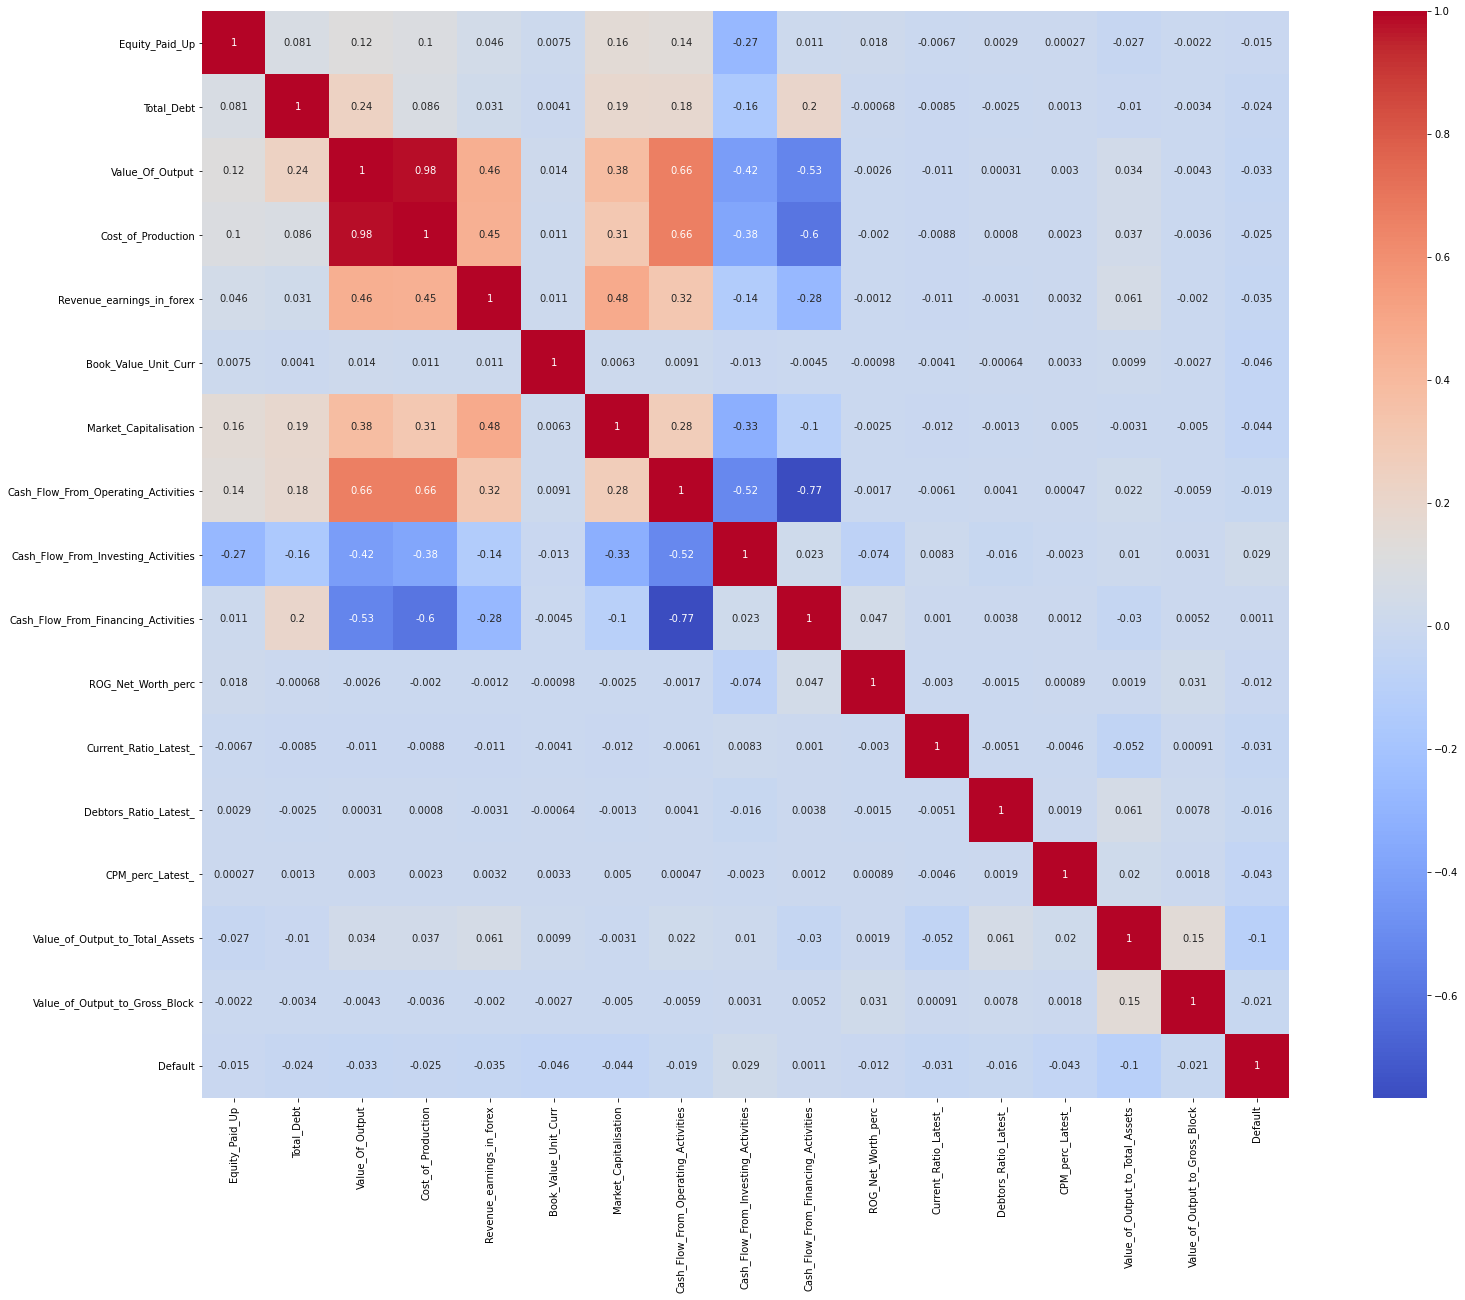

In [1710]:
plt.figure(figsize=(30,20)) 
sns.heatmap(default[['Equity_Paid_Up','Total_Debt','Value_Of_Output','Cost_of_Production','Revenue_earnings_in_forex','Book_Value_Unit_Curr','Market_Capitalisation','Cash_Flow_From_Operating_Activities','Cash_Flow_From_Investing_Activities','Cash_Flow_From_Financing_Activities','ROG_Net_Worth_perc','Current_Ratio_Latest_','Debtors_Ratio_Latest_','CPM_perc_Latest_','Value_of_Output_to_Total_Assets','Value_of_Output_to_Gross_Block','Default'
]].corr(), annot=True,cmap='coolwarm',square=True)

#### Checking the Variance Inflation Factor

In [1711]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [1712]:
DF = default.drop('Co_Name', axis = 1)

In [1713]:
X = DF.drop('Default', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
21,PAT,inf
23,CP,inf
19,PBIT,inf
18,PBDT,inf
17,PBIDT,inf
20,PBT,inf
60,APATM_perc_Latest_,6870479980733.02
59,CPM_perc_Latest_,5012353508481.35
57,PBITM_perc_Latest_,408842052323.59
56,PBIDTM_perc_Latest_,139428170689.94


In [1714]:
X = X.drop('APATM_perc_Latest_', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
21,PAT,inf
19,PBIT,inf
17,PBIDT,inf
20,PBT,inf
23,CP,inf
18,PBDT,inf
37,ROG_Gross_Sales_perc,2039828.02
38,ROG_Net_Sales_perc,2039805.38
12,Net_Sales,15338.71
14,Value_Of_Output,11299.21


In [1715]:
X = X.drop('ROG_Gross_Sales_perc', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
20,PBT,inf
23,CP,inf
21,PAT,inf
19,PBIT,inf
18,PBDT,inf
17,PBIDT,inf
12,Net_Sales,15338.56
14,Value_Of_Output,11299.04
57,PBDTM_perc_Latest_,5653.95
58,CPM_perc_Latest_,5264.81


In [1716]:
X = X.drop('Net_Sales', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
19,PBT,inf
22,CP,inf
20,PAT,inf
18,PBIT,inf
17,PBDT,inf
16,PBIDT,inf
56,PBDTM_perc_Latest_,5653.95
57,CPM_perc_Latest_,5264.81
13,Value_Of_Output,4101.26
38,ROG_Total_Assets_perc,3546.99


In [1717]:
X = X.drop('PBDTM_perc_Latest_', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
18,PBIT,inf
22,CP,inf
20,PAT,inf
19,PBT,inf
17,PBDT,inf
16,PBIDT,inf
13,Value_Of_Output,4101.24
38,ROG_Total_Assets_perc,3546.99
34,ROG_Capital_Employed_perc,3237.19
4,Capital_Employed,2694.11


In [1718]:
X = X.drop('Value_Of_Output', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
17,PBIT,inf
15,PBIDT,inf
21,CP,inf
19,PAT,inf
18,PBT,inf
16,PBDT,inf
37,ROG_Total_Assets_perc,3546.98
33,ROG_Capital_Employed_perc,3237.18
4,Capital_Employed,1547.99
5,Total_Debt,1363.56


In [1719]:
X = X.drop('ROG_Total_Assets_perc', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
16,PBDT,inf
21,CP,inf
19,PAT,inf
18,PBT,inf
17,PBIT,inf
15,PBIDT,inf
4,Capital_Employed,1547.98
5,Total_Debt,1363.55
11,Gross_Sales,1007.45
13,Cost_of_Production,825.24


In [1720]:
X = X.drop('Capital_Employed', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
16,PBIT,inf
15,PBDT,inf
20,CP,inf
18,PAT,inf
17,PBT,inf
14,PBIDT,inf
10,Gross_Sales,553.41
4,Total_Debt,472.66
12,Cost_of_Production,471.56
37,ROG_PBDT_perc,434.49


In [1721]:
X = X.drop('Gross_Sales', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
15,PBIT,inf
19,CP,inf
17,PAT,inf
16,PBT,inf
14,PBDT,inf
13,PBIDT,inf
4,Total_Debt,453.21
36,ROG_PBDT_perc,434.41
35,ROG_PBIDT_perc,380.68
37,ROG_PBIT_perc,227.28


In [1722]:
X = X.drop('Total_Debt', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
14,PBIT,inf
16,PAT,inf
15,PBT,inf
13,PBDT,inf
12,PBIDT,inf
18,CP,inf
35,ROG_PBDT_perc,434.40
34,ROG_PBIDT_perc,380.68
36,ROG_PBIT_perc,227.28
39,ROG_CP_perc,95.86


In [1723]:
X = X.drop('ROG_PBDT_perc', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
14,PBIT,inf
12,PBIDT,inf
18,CP,inf
16,PAT,inf
15,PBT,inf
13,PBDT,inf
35,ROG_PBIT_perc,227.13
34,ROG_PBIDT_perc,210.88
36,ROG_PBT_perc,79.12
38,ROG_CP_perc,51.32


In [1724]:
X = X.drop('ROG_PBIT_perc', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
14,PBIT,inf
16,PAT,inf
18,CP,inf
12,PBIDT,inf
13,PBDT,inf
15,PBT,inf
34,ROG_PBIDT_perc,84.15
35,ROG_PBT_perc,69.13
37,ROG_CP_perc,51.04
8,Total_Assets_to_Liabilities_,49.14


In [1725]:
X = X.drop('ROG_PBIDT_perc', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
13,PBDT,inf
14,PBIT,inf
18,CP,inf
16,PAT,inf
15,PBT,inf
12,PBIDT,inf
8,Total_Assets_to_Liabilities_,49.12
34,ROG_PBT_perc,47.15
17,Adjusted_PAT,40.43
10,Cost_of_Production,35.68


In [1726]:
X = X.drop('Total_Assets_to_Liabilities_', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
12,PBDT,inf
14,PBT,inf
17,CP,inf
15,PAT,inf
11,PBIDT,inf
13,PBIT,inf
33,ROG_PBT_perc,47.15
16,Adjusted_PAT,39.79
9,Cost_of_Production,35.01
6,Current_Assets_,29.20


In [1727]:
X = X.drop('ROG_PBT_perc', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
12,PBDT,inf
17,CP,inf
15,PAT,inf
14,PBT,inf
13,PBIT,inf
11,PBIDT,inf
16,Adjusted_PAT,39.78
9,Cost_of_Production,35.01
6,Current_Assets_,29.20
3,Networth,27.42


In [1728]:
X = X.drop('Adjusted_PAT', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
11,PBIDT,inf
16,CP,inf
15,PAT,inf
14,PBT,inf
13,PBIT,inf
12,PBDT,inf
9,Cost_of_Production,34.19
6,Current_Assets_,28.93
3,Networth,27.36
24,Cash_Flow_From_Operating_Activities,23.45


In [1729]:
X = X.drop('Cost_of_Production', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
10,PBIDT,inf
11,PBDT,inf
15,CP,inf
14,PAT,inf
13,PBT,inf
12,PBIT,inf
6,Current_Assets_,28.27
3,Networth,27.05
1,Networth_Next_Year,22.44
23,Cash_Flow_From_Operating_Activities,22.44


In [1730]:
X = X.drop('Current_Assets_', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
9,PBIDT,inf
13,PAT,inf
14,CP,inf
10,PBDT,inf
11,PBIT,inf
12,PBT,inf
3,Networth,26.96
1,Networth_Next_Year,22.44
42,PBITM_perc_Latest_,15.37
4,Gross_Block_,14.85


In [1731]:
X = X.drop('Networth', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
8,PBIDT,inf
9,PBDT,inf
10,PBIT,inf
11,PBT,inf
12,PAT,inf
13,CP,inf
41,PBITM_perc_Latest_,15.36
30,ROG_CP_perc,14.56
3,Gross_Block_,14.01
29,ROG_PAT_perc,13.22


In [1732]:
X = X.drop('PBITM_perc_Latest_', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
8,PBIDT,inf
9,PBDT,inf
10,PBIT,inf
11,PBT,inf
12,PAT,inf
13,CP,inf
30,ROG_CP_perc,14.56
3,Gross_Block_,14.01
29,ROG_PAT_perc,13.22
21,Cash_Flow_From_Operating_Activities,12.71


In [1733]:
X = X.drop('ROG_CP_perc', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
13,CP,inf
8,PBIDT,inf
9,PBDT,inf
10,PBIT,inf
11,PBT,inf
12,PAT,inf
3,Gross_Block_,14.01
21,Cash_Flow_From_Operating_Activities,12.71
23,Cash_Flow_From_Financing_Activities,12.16
24,ROG_Net_Worth_perc,10.22


In [1734]:
X = X.drop('Gross_Block_', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
12,CP,inf
7,PBIDT,inf
8,PBDT,inf
9,PBIT,inf
10,PBT,inf
11,PAT,inf
20,Cash_Flow_From_Operating_Activities,12.55
22,Cash_Flow_From_Financing_Activities,11.60
23,ROG_Net_Worth_perc,10.22
24,ROG_Capital_Employed_perc,10.09


In [1735]:
X = X.drop('Cash_Flow_From_Operating_Activities', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
10,PBT,inf
12,CP,inf
11,PAT,inf
7,PBIDT,inf
8,PBDT,inf
9,PBIT,inf
22,ROG_Net_Worth_perc,10.22
23,ROG_Capital_Employed_perc,10.09
32,Fixed_Assets_Ratio_Latest_,9.26
15,Capital_expenses_in_forex,8.98


In [1736]:
X = X.drop('ROG_Net_Worth_perc', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
11,PAT,inf
12,CP,inf
7,PBIDT,inf
8,PBDT,inf
9,PBIT,inf
10,PBT,inf
31,Fixed_Assets_Ratio_Latest_,9.26
15,Capital_expenses_in_forex,8.98
42,Value_of_Output_to_Gross_Block,8.98
1,Networth_Next_Year,8.01


In [1737]:
X = X.drop('Fixed_Assets_Ratio_Latest_', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
11,PAT,inf
7,PBIDT,inf
12,CP,inf
10,PBT,inf
9,PBIT,inf
8,PBDT,inf
15,Capital_expenses_in_forex,8.98
1,Networth_Next_Year,8.01
4,Current_Liabilities_and_Provisions_,6.97
21,Cash_Flow_From_Financing_Activities,6.84


In [1738]:
X = X.drop('Capital_expenses_in_forex', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
10,PBT,inf
7,PBIDT,inf
12,CP,inf
11,PAT,inf
9,PBIT,inf
8,PBDT,inf
1,Networth_Next_Year,7.88
4,Current_Liabilities_and_Provisions_,6.93
20,Cash_Flow_From_Financing_Activities,6.80
14,Revenue_expenses_in_forex,5.69


In [1739]:
X = X.drop('Networth_Next_Year', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
9,PBT,inf
6,PBIDT,inf
7,PBDT,inf
8,PBIT,inf
10,PAT,inf
11,CP,inf
19,Cash_Flow_From_Financing_Activities,6.68
3,Current_Liabilities_and_Provisions_,6.03
13,Revenue_expenses_in_forex,5.52
4,Other_Income,4.98


In [1740]:
X = X.drop('Cash_Flow_From_Financing_Activities', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
9,PBT,inf
6,PBIDT,inf
7,PBDT,inf
8,PBIT,inf
10,PAT,inf
11,CP,inf
3,Current_Liabilities_and_Provisions_,5.99
4,Other_Income,4.96
16,Market_Capitalisation,3.58
22,ROG_Cost_of_Production_perc,2.99


In [1741]:
X = X.drop('Current_Liabilities_and_Provisions_', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
8,PBT,inf
9,PAT,inf
10,CP,inf
5,PBIDT,inf
6,PBDT,inf
7,PBIT,inf
3,Other_Income,4.26
15,Market_Capitalisation,3.57
21,ROG_Cost_of_Production_perc,2.99
22,ROG_PAT_perc,2.82


#### Model Building using Logistic Regression for 'Probability at default'
The equation of the Logistic Regression by which we predict the corresponding probabilities and then go on predict a discrete target variable is

y = 11+𝑒−𝑧

Note: z = 𝛽0 +∑𝑛𝑖=1(𝛽𝑖𝑋1)

Now, Importing statsmodels modules

#### Creating logistic regression equation & storing it in f_1
model = SM.logit(formula=’Dependent Variable ~ Σ𝐼𝑛𝑑𝑒𝑝𝑒𝑛𝑑𝑒𝑛𝑡 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒𝑠 (𝑘)’ data = ‘Data Frame containing the required values’).fit()

### Model 1

In [1742]:
default.columns

Index(['Co_Code', 'Co_Name', 'Networth_Next_Year', 'Equity_Paid_Up',
       'Networth', 'Capital_Employed', 'Total_Debt', 'Gross_Block_',
       'Net_Working_Capital_', 'Current_Assets_',
       'Current_Liabilities_and_Provisions_', 'Total_Assets_to_Liabilities_',
       'Gross_Sales', 'Net_Sales', 'Other_Income', 'Value_Of_Output',
       'Cost_of_Production', 'Selling_Cost', 'PBIDT', 'PBDT', 'PBIT', 'PBT',
       'PAT', 'Adjusted_PAT', 'CP', 'Revenue_earnings_in_forex',
       'Revenue_expenses_in_forex', 'Capital_expenses_in_forex',
       'Book_Value_Unit_Curr', 'Book_Value_Adj._Unit_Curr',
       'Market_Capitalisation', 'CEPS_annualised_Unit_Curr',
       'Cash_Flow_From_Operating_Activities',
       'Cash_Flow_From_Investing_Activities',
       'Cash_Flow_From_Financing_Activities', 'ROG_Net_Worth_perc',
       'ROG_Capital_Employed_perc', 'ROG_Gross_Block_perc',
       'ROG_Gross_Sales_perc', 'ROG_Net_Sales_perc',
       'ROG_Cost_of_Production_perc', 'ROG_Total_Assets_perc',


In [1743]:
f_1 = 'Default ~ Selling_Cost + Market_Capitalisation  + Equity_Paid_Up + Other_Income+ Net_Working_Capital_+ ROG_Gross_Block_perc + ROG_Capital_Employed_perc + Revenue_expenses_in_forex + Revenue_earnings_in_forex   + Cash_Flow_From_Investing_Activities  + ROG_Market_Capitalisation_perc + Current_Ratio_Latest_ + Inventory_Ratio_Latest_  + ROG_Cost_of_Production_perc + ROG_Net_Sales_perc + Debtors_Ratio_Latest_ + Total_Asset_Turnover_Ratio_Latest_ + Interest_Cover_Ratio_Latest_ + PBIDTM_perc_Latest_ + CPM_perc_Latest_ + Book_Value_Unit_Curr + Creditors_Velocity_Days + Debtors_Velocity_Days + Inventory_Velocity_Days + Value_of_Output_to_Total_Assets + ROG_Market_Capitalisation_perc  + Value_of_Output_to_Gross_Block'

In [1744]:
from sklearn.model_selection import train_test_split

In [1745]:
y = DF['Default']

In [1746]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [1747]:
default_train = pd.concat([X_train, y_train], axis = 1)
default_test = pd.concat([X_test, y_test], axis = 1)

In [1748]:
default_train.columns

Index(['Co_Code', 'Equity_Paid_Up', 'Net_Working_Capital_', 'Other_Income',
       'Selling_Cost', 'PBIDT', 'PBDT', 'PBIT', 'PBT', 'PAT', 'CP',
       'Revenue_earnings_in_forex', 'Revenue_expenses_in_forex',
       'Book_Value_Unit_Curr', 'Book_Value_Adj._Unit_Curr',
       'Market_Capitalisation', 'CEPS_annualised_Unit_Curr',
       'Cash_Flow_From_Investing_Activities', 'ROG_Capital_Employed_perc',
       'ROG_Gross_Block_perc', 'ROG_Net_Sales_perc',
       'ROG_Cost_of_Production_perc', 'ROG_PAT_perc',
       'ROG_Revenue_earnings_in_forex_perc',
       'ROG_Revenue_expenses_in_forex_perc', 'ROG_Market_Capitalisation_perc',
       'Current_Ratio_Latest_', 'Inventory_Ratio_Latest_',
       'Debtors_Ratio_Latest_', 'Total_Asset_Turnover_Ratio_Latest_',
       'Interest_Cover_Ratio_Latest_', 'PBIDTM_perc_Latest_',
       'CPM_perc_Latest_', 'Debtors_Velocity_Days', 'Creditors_Velocity_Days',
       'Inventory_Velocity_Days', 'Value_of_Output_to_Total_Assets',
       'Value_of_Output_t

In [1749]:
default_train =default_train.drop('Co_Code', axis = 1)

In [1750]:
default_train.columns

Index(['Equity_Paid_Up', 'Net_Working_Capital_', 'Other_Income',
       'Selling_Cost', 'PBIDT', 'PBDT', 'PBIT', 'PBT', 'PAT', 'CP',
       'Revenue_earnings_in_forex', 'Revenue_expenses_in_forex',
       'Book_Value_Unit_Curr', 'Book_Value_Adj._Unit_Curr',
       'Market_Capitalisation', 'CEPS_annualised_Unit_Curr',
       'Cash_Flow_From_Investing_Activities', 'ROG_Capital_Employed_perc',
       'ROG_Gross_Block_perc', 'ROG_Net_Sales_perc',
       'ROG_Cost_of_Production_perc', 'ROG_PAT_perc',
       'ROG_Revenue_earnings_in_forex_perc',
       'ROG_Revenue_expenses_in_forex_perc', 'ROG_Market_Capitalisation_perc',
       'Current_Ratio_Latest_', 'Inventory_Ratio_Latest_',
       'Debtors_Ratio_Latest_', 'Total_Asset_Turnover_Ratio_Latest_',
       'Interest_Cover_Ratio_Latest_', 'PBIDTM_perc_Latest_',
       'CPM_perc_Latest_', 'Debtors_Velocity_Days', 'Creditors_Velocity_Days',
       'Inventory_Velocity_Days', 'Value_of_Output_to_Total_Assets',
       'Value_of_Output_to_Gross_Blo

In [1751]:
default_train.shape

(2330, 38)

In [1752]:
default_test.shape

(1148, 39)

In [1753]:
import statsmodels.formula.api as SM
model_1 = SM.logit(formula = f_1, data=default_train).fit()

Optimization terminated successfully.
         Current function value: 0.176666
         Iterations 16


In [1754]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2330
Model:                          Logit   Df Residuals:                     2303
Method:                           MLE   Df Model:                           26
Date:                Mon, 13 Jun 2022   Pseudo R-squ.:                  0.4643
Time:                        17:25:14   Log-Likelihood:                -411.63
converged:                       True   LL-Null:                       -768.37
Covariance Type:            nonrobust   LLR p-value:                1.080e-133
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -0.6597      0.145     -4.565      0.000      -0.943      -0.376
Selling_Cost                            0.0004      0.003      0.140      0.889      -0.005       0.005
Market_Capitalisation                  -0.0005      0.000     -1.302      0.193      -0.001       0.000
Equity_Paid_Up                       5.674e-05      0.001      0.092      0.927      -0.001       0.001
Other_Income                            0.0005      0.002      0.206      0.837      -0.004       0.005
Net_Working_Capital_                    0.0001   6.67e-05      2.083      0.037    8.23e-06       0.000
ROG_Gross_Block_perc                   -0.0043      0.003     -1.648      0.099      -0.010       0.001
ROG_Capital_Employed_perc              -0.0008      0.001     -0.927      0.354      -0.002       0.001
Revenue_expenses_in_forex            9.516e-05      0.000      0.508      0.612      -0.000       0.000
Revenue_earnings_in_forex              -0.0003      0.001     -0.376      0.707      -0.002       0.001
Cash_Flow_From_Investing_Activities    -0.0005      0.001     -0.696      0.486      -0.002       0.001
ROG_Market_Capitalisation_perc         -0.0012      0.001     -0.963      0.335      -0.004       0.001
Current_Ratio_Latest_                  -0.3028      0.063     -4.786      0.000      -0.427      -0.179
Inventory_Ratio_Latest_                -0.0003      0.001     -0.479      0.632      -0.002       0.001
ROG_Cost_of_Production_perc         -6.252e-05      0.000     -0.453      0.651      -0.000       0.000
ROG_Net_Sales_perc                     -0.0001      0.000     -0.624      0.533      -0.000       0.000
Debtors_Ratio_Latest_                  -0.0011      0.002     -0.627      0.531      -0.005       0.002
Total_Asset_Turnover_Ratio_Latest_     -0.0205      0.067     -0.307      0.759      -0.151       0.110
Interest_Cover_Ratio_Latest_           -0.0020      0.002     -1.230      0.219      -0.005       0.001
PBIDTM_perc_Latest_                    -0.0002   8.46e-05     -2.194      0.028      -0.000   -1.98e-05
CPM_perc_Latest_                     -4.83e-06   5.05e-05     -0.096      0.924      -0.000    9.41e-05
Book_Value_Unit_Curr                   -0.0645      0.006    -11.291      0.000      -0.076      -0.053
Creditors_Velocity_Days              4.104e-06   2.44e-06      1.682      0.092   -6.77e-07    8.88e-06
Debtors_Velocity_Days               -2.123e-05   2.19e-05     -0.971      0.332   -6.41e-05    2.16e-05
Inventory_Velocity_Days                 0.0008      0.001      1.185      0.236      -0.001       0.002
Value_of_Output_to_Total_Assets        -0.1507      0.141     -1.070      0.285      -0.427       0.125
Value_of_Output_to_Gross_Block         -0.0007      0.002     -0.433      0.665      -0.004       0.003
=======================================================================================================

Possibly complet

#### Model 2
Removing cost of production ratio

In [1755]:
f_2 = 'Default ~ Selling_Cost + Market_Capitalisation  + Equity_Paid_Up + Other_Income+ Net_Working_Capital_+ ROG_Gross_Block_perc + ROG_Capital_Employed_perc + Revenue_expenses_in_forex + Revenue_earnings_in_forex   + Cash_Flow_From_Investing_Activities  + ROG_Market_Capitalisation_perc + Current_Ratio_Latest_ + Inventory_Ratio_Latest_   + ROG_Net_Sales_perc + Debtors_Ratio_Latest_ + Total_Asset_Turnover_Ratio_Latest_ + Interest_Cover_Ratio_Latest_ + PBIDTM_perc_Latest_ + CPM_perc_Latest_ + Book_Value_Unit_Curr + Creditors_Velocity_Days + Debtors_Velocity_Days + Inventory_Velocity_Days + Value_of_Output_to_Total_Assets + ROG_Market_Capitalisation_perc  + Value_of_Output_to_Gross_Block'

In [1756]:
model_2 = SM.logit(formula = f_2, data=default_train).fit()

Optimization terminated successfully.
         Current function value: 0.176726
         Iterations 16


In [1757]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2330
Model:                          Logit   Df Residuals:                     2304
Method:                           MLE   Df Model:                           25
Date:                Mon, 13 Jun 2022   Pseudo R-squ.:                  0.4641
Time:                        17:25:15   Log-Likelihood:                -411.77
converged:                       True   LL-Null:                       -768.37
Covariance Type:            nonrobust   LLR p-value:                2.287e-134
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -0.6622      0.144     -4.587      0.000      -0.945      -0.379
Selling_Cost                            0.0004      0.003      0.144      0.885      -0.005       0.005
Market_Capitalisation                  -0.0005      0.000     -1.308      0.191      -0.001       0.000
Equity_Paid_Up                       5.881e-05      0.001      0.096      0.924      -0.001       0.001
Other_Income                            0.0005      0.002      0.208      0.835      -0.004       0.005
Net_Working_Capital_                    0.0001   6.68e-05      2.088      0.037    8.55e-06       0.000
ROG_Gross_Block_perc                   -0.0044      0.003     -1.649      0.099      -0.010       0.001
ROG_Capital_Employed_perc              -0.0008      0.001     -0.926      0.354      -0.002       0.001
Revenue_expenses_in_forex            9.558e-05      0.000      0.512      0.609      -0.000       0.000
Revenue_earnings_in_forex              -0.0003      0.001     -0.374      0.708      -0.002       0.001
Cash_Flow_From_Investing_Activities    -0.0005      0.001     -0.697      0.486      -0.002       0.001
ROG_Market_Capitalisation_perc         -0.0012      0.001     -0.948      0.343      -0.004       0.001
Current_Ratio_Latest_                  -0.3033      0.063     -4.794      0.000      -0.427      -0.179
Inventory_Ratio_Latest_                -0.0003      0.001     -0.477      0.633      -0.002       0.001
ROG_Net_Sales_perc                     -0.0002      0.000     -0.879      0.379      -0.001       0.000
Debtors_Ratio_Latest_                  -0.0011      0.002     -0.623      0.533      -0.005       0.002
Total_Asset_Turnover_Ratio_Latest_     -0.0197      0.067     -0.296      0.767      -0.150       0.111
Interest_Cover_Ratio_Latest_           -0.0020      0.002     -1.233      0.218      -0.005       0.001
PBIDTM_perc_Latest_                    -0.0002   8.47e-05     -2.190      0.029      -0.000   -1.95e-05
CPM_perc_Latest_                     -4.81e-06   5.07e-05     -0.095      0.924      -0.000    9.45e-05
Book_Value_Unit_Curr                   -0.0644      0.006    -11.284      0.000      -0.076      -0.053
Creditors_Velocity_Days              4.107e-06   2.44e-06      1.685      0.092    -6.7e-07    8.88e-06
Debtors_Velocity_Days               -2.111e-05   2.19e-05     -0.966      0.334   -6.39e-05    2.17e-05
Inventory_Velocity_Days                 0.0008      0.001      1.167      0.243      -0.001       0.002
Value_of_Output_to_Total_Assets        -0.1533      0.141     -1.085      0.278      -0.430       0.124
Value_of_Output_to_Gross_Block         -0.0008      0.002     -0.467      0.641      -0.004       0.002
=======================================================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that

### Model 3
Remove CPM RATIO

In [1758]:
f_3 = 'Default ~ Selling_Cost + Market_Capitalisation  + Equity_Paid_Up + Other_Income+ Net_Working_Capital_+ ROG_Gross_Block_perc + ROG_Capital_Employed_perc + Revenue_expenses_in_forex + Revenue_earnings_in_forex   + Cash_Flow_From_Investing_Activities  + ROG_Market_Capitalisation_perc + Current_Ratio_Latest_ + Inventory_Ratio_Latest_  + ROG_Cost_of_Production_perc + ROG_Net_Sales_perc + Debtors_Ratio_Latest_ + Total_Asset_Turnover_Ratio_Latest_ + Interest_Cover_Ratio_Latest_ + PBIDTM_perc_Latest_ + Book_Value_Unit_Curr + Creditors_Velocity_Days + Debtors_Velocity_Days + Inventory_Velocity_Days + Value_of_Output_to_Total_Assets + ROG_Market_Capitalisation_perc  + Value_of_Output_to_Gross_Block'

In [1759]:
model_3 = SM.logit(formula = f_3, data=default_train).fit()

Optimization terminated successfully.
         Current function value: 0.176668
         Iterations 16


In [1760]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2330
Model:                          Logit   Df Residuals:                     2304
Method:                           MLE   Df Model:                           25
Date:                Mon, 13 Jun 2022   Pseudo R-squ.:                  0.4643
Time:                        17:25:15   Log-Likelihood:                -411.64
converged:                       True   LL-Null:                       -768.37
Covariance Type:            nonrobust   LLR p-value:                2.006e-134
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -0.6597      0.145     -4.565      0.000      -0.943      -0.376
Selling_Cost                            0.0004      0.003      0.140      0.889      -0.005       0.005
Market_Capitalisation                  -0.0005      0.000     -1.302      0.193      -0.001       0.000
Equity_Paid_Up                       5.715e-05      0.001      0.093      0.926      -0.001       0.001
Other_Income                            0.0005      0.002      0.206      0.837      -0.004       0.005
Net_Working_Capital_                    0.0001   6.66e-05      2.084      0.037    8.23e-06       0.000
ROG_Gross_Block_perc                   -0.0043      0.003     -1.648      0.099      -0.010       0.001
ROG_Capital_Employed_perc              -0.0008      0.001     -0.927      0.354      -0.002       0.001
Revenue_expenses_in_forex            9.509e-05      0.000      0.507      0.612      -0.000       0.000
Revenue_earnings_in_forex              -0.0003      0.001     -0.376      0.707      -0.002       0.001
Cash_Flow_From_Investing_Activities    -0.0005      0.001     -0.694      0.488      -0.002       0.001
ROG_Market_Capitalisation_perc         -0.0012      0.001     -0.964      0.335      -0.004       0.001
Current_Ratio_Latest_                  -0.3028      0.063     -4.786      0.000      -0.427      -0.179
Inventory_Ratio_Latest_                -0.0003      0.001     -0.479      0.632      -0.002       0.001
ROG_Cost_of_Production_perc         -6.252e-05      0.000     -0.453      0.651      -0.000       0.000
ROG_Net_Sales_perc                     -0.0001      0.000     -0.624      0.533      -0.000       0.000
Debtors_Ratio_Latest_                  -0.0011      0.002     -0.627      0.531      -0.005       0.002
Total_Asset_Turnover_Ratio_Latest_     -0.0205      0.067     -0.307      0.759      -0.151       0.110
Interest_Cover_Ratio_Latest_           -0.0020      0.002     -1.229      0.219      -0.005       0.001
PBIDTM_perc_Latest_                    -0.0002   4.57e-05     -4.203      0.000      -0.000      -0.000
Book_Value_Unit_Curr                   -0.0645      0.006    -11.296      0.000      -0.076      -0.053
Creditors_Velocity_Days              4.103e-06   2.44e-06      1.682      0.093   -6.77e-07    8.88e-06
Debtors_Velocity_Days               -2.122e-05   2.19e-05     -0.970      0.332   -6.41e-05    2.16e-05
Inventory_Velocity_Days                 0.0008      0.001      1.184      0.236      -0.001       0.002
Value_of_Output_to_Total_Assets        -0.1507      0.141     -1.070      0.285      -0.427       0.125
Value_of_Output_to_Gross_Block         -0.0007      0.002     -0.433      0.665      -0.004       0.003
=======================================================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that

### MODEL 4
Remove Networking capital

In [1761]:
f_4 = 'Default ~ Selling_Cost + Market_Capitalisation  + Equity_Paid_Up + Other_Income+  + ROG_Capital_Employed_perc + Revenue_expenses_in_forex + Revenue_earnings_in_forex   + Cash_Flow_From_Investing_Activities  + ROG_Market_Capitalisation_perc + Current_Ratio_Latest_ + Inventory_Ratio_Latest_  + ROG_Cost_of_Production_perc + ROG_Net_Sales_perc + Debtors_Ratio_Latest_ + Total_Asset_Turnover_Ratio_Latest_ + Interest_Cover_Ratio_Latest_ + PBIDTM_perc_Latest_ + CPM_perc_Latest_ + Book_Value_Unit_Curr + Creditors_Velocity_Days + Debtors_Velocity_Days + Inventory_Velocity_Days + Value_of_Output_to_Total_Assets + ROG_Market_Capitalisation_perc  + Value_of_Output_to_Gross_Block'

In [1762]:
model_4 = SM.logit(formula = f_4, data=default_train).fit()

Optimization terminated successfully.
         Current function value: 0.178003
         Iterations 16


In [1763]:
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2330
Model:                          Logit   Df Residuals:                     2305
Method:                           MLE   Df Model:                           24
Date:                Mon, 13 Jun 2022   Pseudo R-squ.:                  0.4602
Time:                        17:25:16   Log-Likelihood:                -414.75
converged:                       True   LL-Null:                       -768.37
Covariance Type:            nonrobust   LLR p-value:                7.407e-134
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -0.6512      0.144     -4.511      0.000      -0.934      -0.368
Selling_Cost                            0.0007      0.003      0.275      0.784      -0.004       0.006
Market_Capitalisation                  -0.0004      0.000     -1.171      0.242      -0.001       0.000
Equity_Paid_Up                      -5.747e-05      0.001     -0.078      0.938      -0.002       0.001
Other_Income                            0.0005      0.002      0.242      0.809      -0.004       0.005
ROG_Capital_Employed_perc              -0.0008      0.001     -0.922      0.357      -0.003       0.001
Revenue_expenses_in_forex            8.592e-05      0.000      0.407      0.684      -0.000       0.001
Revenue_earnings_in_forex              -0.0002      0.001     -0.239      0.811      -0.002       0.001
Cash_Flow_From_Investing_Activities    -0.0005      0.001     -0.388      0.698      -0.003       0.002
ROG_Market_Capitalisation_perc         -0.0013      0.001     -1.018      0.309      -0.004       0.001
Current_Ratio_Latest_                  -0.3034      0.064     -4.757      0.000      -0.428      -0.178
Inventory_Ratio_Latest_                -0.0003      0.001     -0.464      0.643      -0.002       0.001
ROG_Cost_of_Production_perc         -6.451e-05      0.000     -0.459      0.647      -0.000       0.000
ROG_Net_Sales_perc                     -0.0001      0.000     -0.642      0.521      -0.000       0.000
Debtors_Ratio_Latest_                  -0.0011      0.002     -0.623      0.533      -0.005       0.002
Total_Asset_Turnover_Ratio_Latest_     -0.0210      0.068     -0.311      0.756      -0.154       0.111
Interest_Cover_Ratio_Latest_           -0.0017      0.002     -1.027      0.304      -0.005       0.002
PBIDTM_perc_Latest_                    -0.0002   8.47e-05     -2.173      0.030      -0.000    -1.8e-05
CPM_perc_Latest_                    -4.744e-06   5.07e-05     -0.094      0.925      -0.000    9.46e-05
Book_Value_Unit_Curr                   -0.0644      0.006    -11.291      0.000      -0.076      -0.053
Creditors_Velocity_Days              4.105e-06   2.39e-06      1.717      0.086    -5.8e-07    8.79e-06
Debtors_Velocity_Days               -2.071e-05   2.12e-05     -0.975      0.330   -6.23e-05    2.09e-05
Inventory_Velocity_Days                 0.0007      0.001      1.096      0.273      -0.001       0.002
Value_of_Output_to_Total_Assets        -0.1721      0.144     -1.194      0.232      -0.454       0.110
Value_of_Output_to_Gross_Block         -0.0007      0.002     -0.416      0.677      -0.004       0.003
=======================================================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

### MODEL 5
Remove Market Capitalism Ratio

In [1764]:
f_5 = 'Default ~ Selling_Cost + Market_Capitalisation  + Equity_Paid_Up + Other_Income+ Net_Working_Capital_+ ROG_Gross_Block_perc + ROG_Capital_Employed_perc + Revenue_expenses_in_forex + Revenue_earnings_in_forex   + Cash_Flow_From_Investing_Activities   + Current_Ratio_Latest_ + Inventory_Ratio_Latest_  + ROG_Cost_of_Production_perc + ROG_Net_Sales_perc + Debtors_Ratio_Latest_ + Total_Asset_Turnover_Ratio_Latest_ + Interest_Cover_Ratio_Latest_ + PBIDTM_perc_Latest_ + CPM_perc_Latest_ + Book_Value_Unit_Curr + Creditors_Velocity_Days + Debtors_Velocity_Days + Inventory_Velocity_Days + Value_of_Output_to_Total_Assets + ROG_Market_Capitalisation_perc  + Value_of_Output_to_Gross_Block'

In [1765]:
model_5 = SM.logit(formula = f_5, data=default_train).fit()

Optimization terminated successfully.
         Current function value: 0.176666
         Iterations 16


In [1766]:
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2330
Model:                          Logit   Df Residuals:                     2303
Method:                           MLE   Df Model:                           26
Date:                Mon, 13 Jun 2022   Pseudo R-squ.:                  0.4643
Time:                        17:25:16   Log-Likelihood:                -411.63
converged:                       True   LL-Null:                       -768.37
Covariance Type:            nonrobust   LLR p-value:                1.080e-133
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -0.6597      0.145     -4.565      0.000      -0.943      -0.376
Selling_Cost                            0.0004      0.003      0.140      0.889      -0.005       0.005
Market_Capitalisation                  -0.0005      0.000     -1.302      0.193      -0.001       0.000
Equity_Paid_Up                       5.674e-05      0.001      0.092      0.927      -0.001       0.001
Other_Income                            0.0005      0.002      0.206      0.837      -0.004       0.005
Net_Working_Capital_                    0.0001   6.67e-05      2.083      0.037    8.23e-06       0.000
ROG_Gross_Block_perc                   -0.0043      0.003     -1.648      0.099      -0.010       0.001
ROG_Capital_Employed_perc              -0.0008      0.001     -0.927      0.354      -0.002       0.001
Revenue_expenses_in_forex            9.516e-05      0.000      0.508      0.612      -0.000       0.000
Revenue_earnings_in_forex              -0.0003      0.001     -0.376      0.707      -0.002       0.001
Cash_Flow_From_Investing_Activities    -0.0005      0.001     -0.696      0.486      -0.002       0.001
Current_Ratio_Latest_                  -0.3028      0.063     -4.786      0.000      -0.427      -0.179
Inventory_Ratio_Latest_                -0.0003      0.001     -0.479      0.632      -0.002       0.001
ROG_Cost_of_Production_perc         -6.252e-05      0.000     -0.453      0.651      -0.000       0.000
ROG_Net_Sales_perc                     -0.0001      0.000     -0.624      0.533      -0.000       0.000
Debtors_Ratio_Latest_                  -0.0011      0.002     -0.627      0.531      -0.005       0.002
Total_Asset_Turnover_Ratio_Latest_     -0.0205      0.067     -0.307      0.759      -0.151       0.110
Interest_Cover_Ratio_Latest_           -0.0020      0.002     -1.230      0.219      -0.005       0.001
PBIDTM_perc_Latest_                    -0.0002   8.46e-05     -2.194      0.028      -0.000   -1.98e-05
CPM_perc_Latest_                     -4.83e-06   5.05e-05     -0.096      0.924      -0.000    9.41e-05
Book_Value_Unit_Curr                   -0.0645      0.006    -11.291      0.000      -0.076      -0.053
Creditors_Velocity_Days              4.104e-06   2.44e-06      1.682      0.092   -6.77e-07    8.88e-06
Debtors_Velocity_Days               -2.123e-05   2.19e-05     -0.971      0.332   -6.41e-05    2.16e-05
Inventory_Velocity_Days                 0.0008      0.001      1.185      0.236      -0.001       0.002
Value_of_Output_to_Total_Assets        -0.1507      0.141     -1.070      0.285      -0.427       0.125
ROG_Market_Capitalisation_perc         -0.0012      0.001     -0.963      0.335      -0.004       0.001
Value_of_Output_to_Gross_Block         -0.0007      0.002     -0.433      0.665      -0.004       0.003
=======================================================================================================

Possibly complet

### MODEL 6
Remove Book value unit

In [1767]:
f_6 = 'Default ~ Selling_Cost + Market_Capitalisation  + Equity_Paid_Up + Other_Income+ Net_Working_Capital_+ ROG_Gross_Block_perc + ROG_Capital_Employed_perc + Revenue_expenses_in_forex + Revenue_earnings_in_forex   + Cash_Flow_From_Investing_Activities  + ROG_Market_Capitalisation_perc + Current_Ratio_Latest_ + Inventory_Ratio_Latest_  + ROG_Cost_of_Production_perc + ROG_Net_Sales_perc + Debtors_Ratio_Latest_ + Total_Asset_Turnover_Ratio_Latest_ + Interest_Cover_Ratio_Latest_ + PBIDTM_perc_Latest_ + CPM_perc_Latest_ + Creditors_Velocity_Days + Debtors_Velocity_Days + Inventory_Velocity_Days + Value_of_Output_to_Total_Assets + ROG_Market_Capitalisation_perc  + Value_of_Output_to_Gross_Block'

In [1768]:
model_6 = SM.logit(formula = f_6, data=default_train).fit()

Optimization terminated successfully.
         Current function value: 0.259401
         Iterations 16


In [1769]:
model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2330
Model:                          Logit   Df Residuals:                     2304
Method:                           MLE   Df Model:                           25
Date:                Mon, 13 Jun 2022   Pseudo R-squ.:                  0.2134
Time:                        17:25:16   Log-Likelihood:                -604.40
converged:                       True   LL-Null:                       -768.37
Covariance Type:            nonrobust   LLR p-value:                 1.429e-54
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -0.6975      0.133     -5.261      0.000      -0.957      -0.438
Selling_Cost                           -0.0003      0.003     -0.104      0.917      -0.007       0.006
Market_Capitalisation                  -0.0010      0.000     -2.448      0.014      -0.002      -0.000
Equity_Paid_Up                       8.854e-05      0.000      0.610      0.542      -0.000       0.000
Other_Income                            0.0003      0.001      0.263      0.792      -0.002       0.003
Net_Working_Capital_                   -0.0001      0.000     -0.560      0.575      -0.000       0.000
ROG_Gross_Block_perc                   -0.0065      0.003     -2.351      0.019      -0.012      -0.001
ROG_Capital_Employed_perc              -0.0020      0.001     -2.209      0.027      -0.004      -0.000
Revenue_expenses_in_forex            2.088e-05      0.000      0.157      0.875      -0.000       0.000
Revenue_earnings_in_forex              -0.0019      0.001     -1.564      0.118      -0.004       0.000
Cash_Flow_From_Investing_Activities     0.0021      0.002      1.235      0.217      -0.001       0.005
ROG_Market_Capitalisation_perc         -0.0023      0.001     -2.009      0.045      -0.004    -5.5e-05
Current_Ratio_Latest_                  -0.5566      0.082     -6.778      0.000      -0.718      -0.396
Inventory_Ratio_Latest_                -0.0001      0.000     -0.373      0.709      -0.001       0.001
ROG_Cost_of_Production_perc         -2.095e-05   8.39e-05     -0.250      0.803      -0.000       0.000
ROG_Net_Sales_perc                  -3.865e-05      0.000     -0.309      0.757      -0.000       0.000
Debtors_Ratio_Latest_                  -0.0009      0.002     -0.629      0.530      -0.004       0.002
Total_Asset_Turnover_Ratio_Latest_      0.0811      0.049      1.650      0.099      -0.015       0.178
Interest_Cover_Ratio_Latest_           -0.0027      0.001     -2.026      0.043      -0.005   -8.86e-05
PBIDTM_perc_Latest_                 -1.704e-05   6.05e-05     -0.282      0.778      -0.000       0.000
CPM_perc_Latest_                     1.169e-05   3.45e-05      0.339      0.735   -5.59e-05    7.93e-05
Creditors_Velocity_Days              2.887e-06   2.47e-06      1.167      0.243   -1.96e-06    7.74e-06
Debtors_Velocity_Days               -1.807e-06    7.9e-06     -0.229      0.819   -1.73e-05    1.37e-05
Inventory_Velocity_Days                 0.0007      0.001      1.458      0.145      -0.000       0.002
Value_of_Output_to_Total_Assets        -0.5918      0.146     -4.047      0.000      -0.878      -0.305
Value_of_Output_to_Gross_Block         -0.0013      0.002     -0.762      0.446      -0.005       0.002
=======================================================================================================

Possibly complete quasi-separation: A fraction 0.15 of observations can be
perfectly predicted. This might indicate that

### MODEL 7
Remove Value of output to gross block

In [1770]:
f_7 = 'Default ~ Selling_Cost + Market_Capitalisation  + Equity_Paid_Up + Other_Income+ Net_Working_Capital_+ ROG_Gross_Block_perc + ROG_Capital_Employed_perc + Revenue_expenses_in_forex + Revenue_earnings_in_forex   + Cash_Flow_From_Investing_Activities  + ROG_Market_Capitalisation_perc + Current_Ratio_Latest_ + Inventory_Ratio_Latest_  + ROG_Cost_of_Production_perc + ROG_Net_Sales_perc + Debtors_Ratio_Latest_ + Total_Asset_Turnover_Ratio_Latest_ + Interest_Cover_Ratio_Latest_ + PBIDTM_perc_Latest_ + CPM_perc_Latest_ + Book_Value_Unit_Curr + Creditors_Velocity_Days + Debtors_Velocity_Days + Inventory_Velocity_Days + Value_of_Output_to_Total_Assets + ROG_Market_Capitalisation_perc'

In [1771]:
model_7 = SM.logit(formula = f_7, data=default_train).fit()

Optimization terminated successfully.
         Current function value: 0.176756
         Iterations 16


In [1772]:
model_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2330
Model:                          Logit   Df Residuals:                     2304
Method:                           MLE   Df Model:                           25
Date:                Mon, 13 Jun 2022   Pseudo R-squ.:                  0.4640
Time:                        17:25:17   Log-Likelihood:                -411.84
converged:                       True   LL-Null:                       -768.37
Covariance Type:            nonrobust   LLR p-value:                2.446e-134
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -0.6605      0.144     -4.578      0.000      -0.943      -0.378
Selling_Cost                            0.0004      0.003      0.154      0.877      -0.005       0.005
Market_Capitalisation                  -0.0005      0.000     -1.350      0.177      -0.001       0.000
Equity_Paid_Up                       6.159e-05      0.001      0.100      0.920      -0.001       0.001
Other_Income                            0.0005      0.002      0.209      0.834      -0.004       0.005
Net_Working_Capital_                    0.0001   6.68e-05      2.110      0.035    9.99e-06       0.000
ROG_Gross_Block_perc                   -0.0043      0.003     -1.641      0.101      -0.009       0.001
ROG_Capital_Employed_perc              -0.0008      0.001     -0.934      0.350      -0.002       0.001
Revenue_expenses_in_forex            9.585e-05      0.000      0.512      0.608      -0.000       0.000
Revenue_earnings_in_forex              -0.0003      0.001     -0.376      0.707      -0.002       0.001
Cash_Flow_From_Investing_Activities    -0.0005      0.001     -0.730      0.465      -0.002       0.001
ROG_Market_Capitalisation_perc         -0.0012      0.001     -0.944      0.345      -0.004       0.001
Current_Ratio_Latest_                  -0.3046      0.063     -4.816      0.000      -0.429      -0.181
Inventory_Ratio_Latest_                -0.0003      0.001     -0.477      0.633      -0.002       0.001
ROG_Cost_of_Production_perc         -6.732e-05      0.000     -0.483      0.629      -0.000       0.000
ROG_Net_Sales_perc                     -0.0001      0.000     -0.623      0.533      -0.000       0.000
Debtors_Ratio_Latest_                  -0.0012      0.002     -0.638      0.523      -0.005       0.002
Total_Asset_Turnover_Ratio_Latest_     -0.0218      0.067     -0.326      0.745      -0.153       0.109
Interest_Cover_Ratio_Latest_           -0.0020      0.002     -1.226      0.220      -0.005       0.001
PBIDTM_perc_Latest_                    -0.0002   8.49e-05     -2.188      0.029      -0.000   -1.94e-05
CPM_perc_Latest_                    -4.842e-06   5.09e-05     -0.095      0.924      -0.000    9.49e-05
Book_Value_Unit_Curr                   -0.0646      0.006    -11.291      0.000      -0.076      -0.053
Creditors_Velocity_Days              4.111e-06   2.45e-06      1.681      0.093   -6.82e-07     8.9e-06
Debtors_Velocity_Days                -2.12e-05   2.19e-05     -0.967      0.334   -6.42e-05    2.18e-05
Inventory_Velocity_Days                 0.0008      0.001      1.202      0.229      -0.001       0.002
Value_of_Output_to_Total_Assets        -0.1562      0.141     -1.108      0.268      -0.433       0.120
=======================================================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that

### MODEL 8
Remove Interest cover ratio

In [1773]:
f_8 = 'Default ~ Selling_Cost + Market_Capitalisation  + Equity_Paid_Up + Other_Income+ Net_Working_Capital_+ ROG_Gross_Block_perc + ROG_Capital_Employed_perc + Revenue_expenses_in_forex + Revenue_earnings_in_forex   + Cash_Flow_From_Investing_Activities  + ROG_Market_Capitalisation_perc + Current_Ratio_Latest_ + Inventory_Ratio_Latest_  + ROG_Cost_of_Production_perc + ROG_Net_Sales_perc + Debtors_Ratio_Latest_ + Total_Asset_Turnover_Ratio_Latest_ + PBIDTM_perc_Latest_ + CPM_perc_Latest_ + Book_Value_Unit_Curr + Creditors_Velocity_Days + Debtors_Velocity_Days + Inventory_Velocity_Days + Value_of_Output_to_Total_Assets + ROG_Market_Capitalisation_perc  + Value_of_Output_to_Gross_Block'

In [1774]:
model_8 = SM.logit(formula = f_8, data=default_train).fit()

Optimization terminated successfully.
         Current function value: 0.176946
         Iterations 16


In [1775]:
model_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2330
Model:                          Logit   Df Residuals:                     2304
Method:                           MLE   Df Model:                           25
Date:                Mon, 13 Jun 2022   Pseudo R-squ.:                  0.4634
Time:                        17:25:17   Log-Likelihood:                -412.28
converged:                       True   LL-Null:                       -768.37
Covariance Type:            nonrobust   LLR p-value:                3.753e-134
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -0.6417      0.144     -4.468      0.000      -0.923      -0.360
Selling_Cost                            0.0002      0.003      0.068      0.946      -0.005       0.005
Market_Capitalisation                  -0.0004      0.000     -1.317      0.188      -0.001       0.000
Equity_Paid_Up                       5.308e-05      0.001      0.082      0.935      -0.001       0.001
Other_Income                            0.0004      0.002      0.179      0.858      -0.004       0.005
Net_Working_Capital_                    0.0001   6.46e-05      2.140      0.032    1.16e-05       0.000
ROG_Gross_Block_perc                   -0.0042      0.003     -1.585      0.113      -0.009       0.001
ROG_Capital_Employed_perc              -0.0008      0.001     -0.934      0.350      -0.002       0.001
Revenue_expenses_in_forex            9.607e-05      0.000      0.515      0.606      -0.000       0.000
Revenue_earnings_in_forex              -0.0003      0.001     -0.354      0.723      -0.002       0.001
Cash_Flow_From_Investing_Activities    -0.0005      0.001     -0.512      0.609      -0.002       0.001
ROG_Market_Capitalisation_perc         -0.0012      0.001     -0.985      0.324      -0.004       0.001
Current_Ratio_Latest_                  -0.3094      0.064     -4.868      0.000      -0.434      -0.185
Inventory_Ratio_Latest_                -0.0003      0.001     -0.472      0.637      -0.002       0.001
ROG_Cost_of_Production_perc         -6.329e-05      0.000     -0.455      0.649      -0.000       0.000
ROG_Net_Sales_perc                     -0.0001      0.000     -0.628      0.530      -0.000       0.000
Debtors_Ratio_Latest_                  -0.0012      0.002     -0.663      0.507      -0.005       0.002
Total_Asset_Turnover_Ratio_Latest_     -0.0181      0.067     -0.271      0.786      -0.149       0.113
PBIDTM_perc_Latest_                    -0.0002   8.73e-05     -2.154      0.031      -0.000    -1.7e-05
CPM_perc_Latest_                    -4.005e-06   5.39e-05     -0.074      0.941      -0.000       0.000
Book_Value_Unit_Curr                   -0.0646      0.006    -11.304      0.000      -0.076      -0.053
Creditors_Velocity_Days              4.103e-06   2.43e-06      1.690      0.091   -6.54e-07    8.86e-06
Debtors_Velocity_Days               -2.017e-05   2.17e-05     -0.929      0.353   -6.27e-05    2.24e-05
Inventory_Velocity_Days                 0.0008      0.001      1.239      0.215      -0.000       0.002
Value_of_Output_to_Total_Assets        -0.1615      0.142     -1.137      0.255      -0.440       0.117
Value_of_Output_to_Gross_Block         -0.0008      0.002     -0.441      0.659      -0.004       0.003
=======================================================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that

### MODEL 9
Remove Capital employed ratio

In [1776]:
f_9 = 'Default ~ Selling_Cost + Market_Capitalisation  + Equity_Paid_Up + Other_Income+ Net_Working_Capital_+ ROG_Gross_Block_perc + Revenue_expenses_in_forex + Revenue_earnings_in_forex   + Cash_Flow_From_Investing_Activities  + ROG_Market_Capitalisation_perc + Current_Ratio_Latest_ + Inventory_Ratio_Latest_  + ROG_Cost_of_Production_perc + ROG_Net_Sales_perc + Debtors_Ratio_Latest_ + Total_Asset_Turnover_Ratio_Latest_ + Interest_Cover_Ratio_Latest_ + PBIDTM_perc_Latest_ + CPM_perc_Latest_ + Book_Value_Unit_Curr + Creditors_Velocity_Days + Debtors_Velocity_Days + Inventory_Velocity_Days + Value_of_Output_to_Total_Assets + ROG_Market_Capitalisation_perc  + Value_of_Output_to_Gross_Block'

In [1777]:
model_9 = SM.logit(formula = f_9, data=default_train).fit()

Optimization terminated successfully.
         Current function value: 0.177327
         Iterations 14


In [1778]:
model_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2330
Model:                          Logit   Df Residuals:                     2304
Method:                           MLE   Df Model:                           25
Date:                Mon, 13 Jun 2022   Pseudo R-squ.:                  0.4623
Time:                        17:25:18   Log-Likelihood:                -413.17
converged:                       True   LL-Null:                       -768.37
Covariance Type:            nonrobust   LLR p-value:                8.870e-134
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -0.6446      0.144     -4.465      0.000      -0.928      -0.362
Selling_Cost                            0.0007      0.002      0.279      0.781      -0.004       0.005
Market_Capitalisation                  -0.0004      0.000     -1.272      0.203      -0.001       0.000
Equity_Paid_Up                       8.984e-05      0.001      0.127      0.899      -0.001       0.001
Other_Income                            0.0002      0.002      0.090      0.928      -0.004       0.005
Net_Working_Capital_                    0.0001   6.44e-05      2.095      0.036    8.67e-06       0.000
ROG_Gross_Block_perc                   -0.0044      0.003     -1.661      0.097      -0.010       0.001
Revenue_expenses_in_forex            9.598e-05      0.000      0.491      0.623      -0.000       0.000
Revenue_earnings_in_forex              -0.0003      0.001     -0.344      0.731      -0.002       0.001
Cash_Flow_From_Investing_Activities    -0.0003      0.001     -0.259      0.795      -0.003       0.002
ROG_Market_Capitalisation_perc         -0.0013      0.001     -1.060      0.289      -0.004       0.001
Current_Ratio_Latest_                  -0.3096      0.064     -4.863      0.000      -0.434      -0.185
Inventory_Ratio_Latest_                -0.0004      0.001     -0.498      0.619      -0.002       0.001
ROG_Cost_of_Production_perc         -5.962e-05      0.000     -0.447      0.655      -0.000       0.000
ROG_Net_Sales_perc                     -0.0001      0.000     -0.681      0.496      -0.001       0.000
Debtors_Ratio_Latest_                  -0.0011      0.002     -0.618      0.536      -0.005       0.002
Total_Asset_Turnover_Ratio_Latest_     -0.0236      0.067     -0.351      0.726      -0.155       0.108
Interest_Cover_Ratio_Latest_           -0.0021      0.002     -1.252      0.211      -0.005       0.001
PBIDTM_perc_Latest_                    -0.0002   8.41e-05     -2.230      0.026      -0.000   -2.27e-05
CPM_perc_Latest_                     -4.81e-06      5e-05     -0.096      0.923      -0.000    9.32e-05
Book_Value_Unit_Curr                   -0.0651      0.006    -11.414      0.000      -0.076      -0.054
Creditors_Velocity_Days              4.109e-06   2.43e-06      1.691      0.091   -6.54e-07    8.87e-06
Debtors_Velocity_Days               -2.099e-05   2.19e-05     -0.958      0.338   -6.39e-05     2.2e-05
Inventory_Velocity_Days                 0.0008      0.001      1.220      0.222      -0.000       0.002
Value_of_Output_to_Total_Assets        -0.1534      0.141     -1.086      0.278      -0.430       0.123
Value_of_Output_to_Gross_Block         -0.0012      0.002     -0.705      0.481      -0.004       0.002
=======================================================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that

### MODEL 10
Remove PBIDTM Ratio

In [1779]:
f_10 = 'Default ~ Selling_Cost + Market_Capitalisation  + Equity_Paid_Up + Other_Income+ Net_Working_Capital_+ ROG_Gross_Block_perc + ROG_Capital_Employed_perc + Revenue_expenses_in_forex + Revenue_earnings_in_forex   + Cash_Flow_From_Investing_Activities  + ROG_Market_Capitalisation_perc + Current_Ratio_Latest_ + Inventory_Ratio_Latest_  + ROG_Cost_of_Production_perc + ROG_Net_Sales_perc + Debtors_Ratio_Latest_ + Total_Asset_Turnover_Ratio_Latest_ + Interest_Cover_Ratio_Latest_ + CPM_perc_Latest_ + Book_Value_Unit_Curr + Creditors_Velocity_Days + Debtors_Velocity_Days + Inventory_Velocity_Days + Value_of_Output_to_Total_Assets + ROG_Market_Capitalisation_perc  + Value_of_Output_to_Gross_Block'

In [1780]:
model_10 = SM.logit(formula = f_10, data=default_train).fit()

Optimization terminated successfully.
         Current function value: 0.177210
         Iterations 16


In [1781]:
model_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2330
Model:                          Logit   Df Residuals:                     2304
Method:                           MLE   Df Model:                           25
Date:                Mon, 13 Jun 2022   Pseudo R-squ.:                  0.4626
Time:                        17:25:18   Log-Likelihood:                -412.90
converged:                       True   LL-Null:                       -768.37
Covariance Type:            nonrobust   LLR p-value:                6.816e-134
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -0.6491      0.144     -4.494      0.000      -0.932      -0.366
Selling_Cost                            0.0004      0.003      0.138      0.890      -0.005       0.005
Market_Capitalisation                  -0.0005      0.000     -1.308      0.191      -0.001       0.000
Equity_Paid_Up                       4.962e-05      0.001      0.081      0.935      -0.001       0.001
Other_Income                            0.0005      0.002      0.212      0.832      -0.004       0.005
Net_Working_Capital_                    0.0001   6.73e-05      2.070      0.038    7.37e-06       0.000
ROG_Gross_Block_perc                   -0.0043      0.003     -1.648      0.099      -0.009       0.001
ROG_Capital_Employed_perc              -0.0008      0.001     -0.932      0.351      -0.002       0.001
Revenue_expenses_in_forex            9.492e-05      0.000      0.511      0.609      -0.000       0.000
Revenue_earnings_in_forex              -0.0003      0.001     -0.382      0.703      -0.002       0.001
Cash_Flow_From_Investing_Activities    -0.0005      0.001     -0.737      0.461      -0.002       0.001
ROG_Market_Capitalisation_perc         -0.0012      0.001     -0.974      0.330      -0.004       0.001
Current_Ratio_Latest_                  -0.3046      0.063     -4.805      0.000      -0.429      -0.180
Inventory_Ratio_Latest_                -0.0003      0.001     -0.482      0.630      -0.002       0.001
ROG_Cost_of_Production_perc         -6.315e-05      0.000     -0.457      0.647      -0.000       0.000
ROG_Net_Sales_perc                     -0.0001      0.000     -0.626      0.531      -0.000       0.000
Debtors_Ratio_Latest_                  -0.0012      0.002     -0.630      0.528      -0.005       0.002
Total_Asset_Turnover_Ratio_Latest_     -0.0208      0.067     -0.311      0.756      -0.152       0.110
Interest_Cover_Ratio_Latest_           -0.0021      0.002     -1.358      0.174      -0.005       0.001
CPM_perc_Latest_                    -3.139e-05    1.7e-05     -1.843      0.065   -6.48e-05    1.99e-06
Book_Value_Unit_Curr                   -0.0640      0.006    -11.246      0.000      -0.075      -0.053
Creditors_Velocity_Days              4.083e-06   2.43e-06      1.679      0.093   -6.84e-07    8.85e-06
Debtors_Velocity_Days               -2.114e-05   2.18e-05     -0.969      0.333   -6.39e-05    2.16e-05
Inventory_Velocity_Days                 0.0008      0.001      1.187      0.235      -0.001       0.002
Value_of_Output_to_Total_Assets        -0.1561      0.142     -1.101      0.271      -0.434       0.122
Value_of_Output_to_Gross_Block         -0.0008      0.002     -0.446      0.656      -0.004       0.003
=======================================================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that

### Validating the model

### Train Data

In [1800]:
y_pred_train = model_5.predict(default_train)

In [1801]:
y_class_pred=[]
for i in range(0,len(y_pred_train)):
    if np.array(y_pred_train)[i]>0.35:
        a=1
    else:
        a=0
    y_class_pred.append(a)

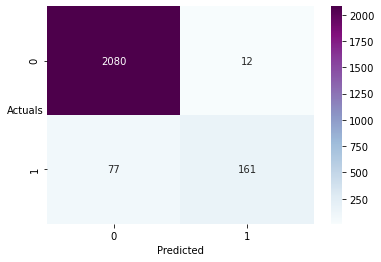

In [1802]:
sns.heatmap((metrics.confusion_matrix(default_train['Default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='BuPu');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [1803]:
print(metrics.classification_report(default_train['Default'],y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.964     0.994     0.979      2092
           1      0.931     0.676     0.783       238

    accuracy                          0.962      2330
   macro avg      0.947     0.835     0.881      2330
weighted avg      0.961     0.962     0.959      2330



### Test data

In [1804]:
y_pred_test = model_5.predict(default_test)

In [1805]:
y_class_pred=[]
for i in range(0,len(y_pred_test)):
    if np.array(y_pred_test)[i]>0.35:
        a=1
    else:
        a=0
    y_class_pred.append(a)

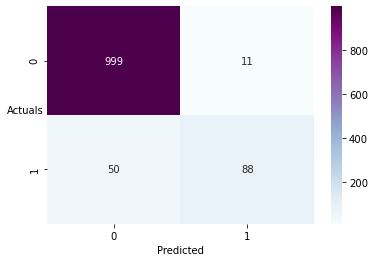

In [1806]:
sns.heatmap((metrics.confusion_matrix(default_test['Default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='BuPu');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [1807]:
print(metrics.classification_report(default_test['Default'],y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.952     0.989     0.970      1010
           1      0.889     0.638     0.743       138

    accuracy                          0.947      1148
   macro avg      0.921     0.813     0.856      1148
weighted avg      0.945     0.947     0.943      1148

